# **Import** **packages**

In [1]:
import numpy as np
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn import preprocessing
import random
import os
import pandas as pd
from sklearn.datasets import load_svmlight_file
import math
from scipy.sparse import find, csr_matrix
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
random.seed(551)
np.random.seed(551)

# **Task 1: Data processing**

In [191]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Task 1.1 IMDB Reviews

In [192]:
with open('/content/gdrive/My Drive/COMP 551/A2/imdb.vocab.txt') as f:
    lines = f.readlines()
imdb_vocab = [word.strip() for word in lines]

In [193]:
def load_ds(path):
  """
  Load the training/test set. Input the directory path as a string, loop through all 
  the txt files in the folder and assign the true label. Output a dataframe.
  """
  pos_dir = os.path.join(path, "pos")
  neg_dir = os.path.join(path, "neg")

  ds = []

  for filename in os.listdir(pos_dir):
    file = os.path.join(pos_dir, filename)
    with open(file, encoding='utf8') as f:
      ds.append([1, f.read()])

  for filename in os.listdir(neg_dir):
    file = os.path.join(neg_dir, filename)
    with open(file, encoding='utf8') as f:
      ds.append([0, f.read()])
  
  ds_np = np.array(ds)
  df = pd.DataFrame(ds_np, columns = ['label_true','text'])

  return df


In [194]:
# train_ds = load_ds("/content/gdrive/My Drive/COMP 551/A2/train")
train_imdb = pd.read_csv("/content/gdrive/My Drive/COMP 551/A2/train.csv")
del train_imdb['Unnamed: 0']

In [195]:
train_imdb

,label_true,text
0,1,For a movie that gets no respect there sure ar...
1,1,Bizarre horror movie filled with famous faces ...
2,1,"A solid, if unremarkable film. Matthau, as Ein..."
3,1,It's a strange feeling to sit alone in a theat...
4,1,"You probably all already know this by now, but..."
...,...,...
24995,0,"My comments may be a bit of a spoiler, for wha..."
24996,0,"The ""saucy"" misadventures of four au pairs who..."
24997,0,"Oh, those Italians! Assuming that movies about..."
24998,0,Eight academy nominations? It's beyond belief....


In [196]:
# test_ds = load_ds("/content/gdrive/My Drive/COMP 551/A2/test")
test_imdb = pd.read_csv("/content/gdrive/My Drive/COMP 551/A2/test.csv")
del test_imdb['Unnamed: 0']

In [197]:
test_imdb

,label_true,text
0,1,"Based on an actual story, John Boorman shows t..."
1,1,This is a gem. As a Film Four production - the...
2,1,"I really like this show. It has drama, romance..."
3,1,This is the best 3-D experience Disney has at ...
4,1,"Of the Korean movies I've seen, only three had..."
...,...,...
24995,0,With actors like Depardieu and Richard it is r...
24996,0,If you like to get a couple of fleeting glimps...
24997,0,When something can be anything you want it to ...
24998,0,"I had heard good things about ""States of Grace..."


In [198]:
train_X_imdb, train_Y_imdb = load_svmlight_file("/content/gdrive/My Drive/COMP 551/A2/train/labeledBow.feat.txt", 
                                      multilabel = True, 
                                      zero_based = True)

In [199]:
print("(text, feature)   appearances")
# X value: the tuple (a, b) for a = index of each text (2nd col of df above), 
#                               b = index of the feature in imdb.vocab
#          the number n = number of appearances of that feature in the text
print(train_X_imdb) 
print("Ratings")
# Y value: rating of each text
print(train_Y_imdb) 

(text, feature)   appearances
  (0, 0)	9.0
  (0, 1)	1.0
  (0, 2)	4.0
  (0, 3)	4.0
  (0, 4)	6.0
  (0, 5)	4.0
  (0, 6)	2.0
  (0, 7)	2.0
  (0, 8)	4.0
  (0, 10)	4.0
  (0, 12)	2.0
  (0, 26)	1.0
  (0, 27)	1.0
  (0, 28)	1.0
  (0, 29)	2.0
  (0, 32)	1.0
  (0, 41)	1.0
  (0, 45)	1.0
  (0, 47)	1.0
  (0, 50)	1.0
  (0, 54)	2.0
  (0, 57)	1.0
  (0, 59)	1.0
  (0, 63)	2.0
  (0, 64)	1.0
  :	:
  (24999, 420)	1.0
  (24999, 421)	1.0
  (24999, 426)	1.0
  (24999, 427)	1.0
  (24999, 583)	1.0
  (24999, 585)	1.0
  (24999, 642)	1.0
  (24999, 679)	2.0
  (24999, 680)	1.0
  (24999, 1065)	1.0
  (24999, 1093)	1.0
  (24999, 1224)	1.0
  (24999, 1407)	1.0
  (24999, 1773)	1.0
  (24999, 3947)	1.0
  (24999, 4292)	1.0
  (24999, 4569)	1.0
  (24999, 4949)	1.0
  (24999, 5072)	1.0
  (24999, 5792)	1.0
  (24999, 5947)	1.0
  (24999, 9702)	1.0
  (24999, 12190)	1.0
  (24999, 12803)	1.0
  (24999, 15612)	1.0
Ratings
[(9.0,), (7.0,), (9.0,), (10.0,), (8.0,), (10.0,), (10.0,), (7.0,), (7.0,), (7.0,), (9.0,), (9.0,), (9.0,), (7.0,), (10.0

In [200]:
test_X_imdb, test_Y_imdb = load_svmlight_file("/content/gdrive/My Drive/COMP 551/A2/test/labeledBow.feat.txt", 
                                      multilabel = True, 
                                      zero_based = True)

In [201]:
print("(text, feature)   appearances")
# X value: the tuple (a, b) for a = index of each text (2nd col of df above), 
#                               b = index of the feature in imdb.vocab
#          the number n = number of appearances of that feature in the text
print(test_X_imdb) 
print("Ratings")
# Y value: rating of each text
print(test_Y_imdb)

(text, feature)   appearances
  (0, 0)	7.0
  (0, 1)	4.0
  (0, 2)	2.0
  (0, 3)	5.0
  (0, 4)	5.0
  (0, 5)	1.0
  (0, 6)	3.0
  (0, 7)	1.0
  (0, 8)	6.0
  (0, 9)	3.0
  (0, 10)	4.0
  (0, 11)	6.0
  (0, 12)	1.0
  (0, 14)	2.0
  (0, 15)	4.0
  (0, 16)	1.0
  (0, 19)	2.0
  (0, 20)	2.0
  (0, 21)	1.0
  (0, 26)	1.0
  (0, 30)	2.0
  (0, 34)	1.0
  (0, 44)	1.0
  (0, 45)	1.0
  (0, 48)	1.0
  :	:
  (24999, 1143)	1.0
  (24999, 1245)	1.0
  (24999, 1274)	2.0
  (24999, 1349)	1.0
  (24999, 1354)	1.0
  (24999, 1536)	1.0
  (24999, 1577)	1.0
  (24999, 1605)	1.0
  (24999, 1799)	2.0
  (24999, 1926)	1.0
  (24999, 1951)	1.0
  (24999, 3126)	1.0
  (24999, 3393)	1.0
  (24999, 3633)	1.0
  (24999, 3970)	1.0
  (24999, 6435)	1.0
  (24999, 6623)	1.0
  (24999, 6869)	1.0
  (24999, 7648)	1.0
  (24999, 9149)	1.0
  (24999, 11342)	1.0
  (24999, 12110)	1.0
  (24999, 13861)	1.0
  (24999, 30627)	1.0
  (24999, 43242)	1.0
Ratings
[(10.0,), (10.0,), (7.0,), (7.0,), (10.0,), (7.0,), (7.0,), (9.0,), (9.0,), (7.0,), (7.0,), (8.0,), (9.0,), (9.

### Rare and Stopwords

In [202]:
appear = train_X_imdb.copy()
text, feat = appear.nonzero()
appear[text, feat] = 1

In [203]:
appear = sum(appear[:,])
lower_bound = 0.01 * 25000
upper_bound = 0.5 * 25000
appear = appear.multiply(appear >= lower_bound)
appear = appear.multiply(appear <= upper_bound)
print(appear)

  (0, 21)	10308.0
  (0, 23)	10677.0
  (0, 27)	8595.0
  (0, 30)	11689.0
  (0, 31)	12203.0
  (0, 32)	11304.0
  (0, 33)	10370.0
  (0, 34)	11712.0
  (0, 35)	11564.0
  (0, 36)	11495.0
  (0, 37)	10802.0
  (0, 38)	6454.0
  (0, 39)	10329.0
  (0, 40)	10546.0
  (0, 41)	10485.0
  (0, 42)	10694.0
  (0, 43)	10054.0
  (0, 44)	10422.0
  (0, 45)	9925.0
  (0, 46)	7387.0
  (0, 47)	9639.0
  (0, 48)	9507.0
  (0, 49)	9059.0
  (0, 50)	9032.0
  (0, 51)	5466.0
  :	:
  (0, 1867)	254.0
  (0, 1868)	253.0
  (0, 1869)	256.0
  (0, 1871)	263.0
  (0, 1873)	255.0
  (0, 1876)	262.0
  (0, 1877)	250.0
  (0, 1886)	257.0
  (0, 1888)	254.0
  (0, 1899)	252.0
  (0, 1900)	257.0
  (0, 1902)	259.0
  (0, 1904)	252.0
  (0, 1905)	254.0
  (0, 1907)	250.0
  (0, 1912)	252.0
  (0, 1924)	252.0
  (0, 1928)	250.0
  (0, 1929)	251.0
  (0, 1933)	253.0
  (0, 1935)	252.0
  (0, 1938)	254.0
  (0, 1958)	250.0
  (0, 1967)	250.0
  (0, 1980)	250.0


/usr/local/lib/python3.7/dist-packages/scipy/sparse/compressed.py:291: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


### Simple Linear Regression for feature selection

In [204]:
train_Y_imdb_np = np.array(train_Y_imdb).flatten()
train_Y_imdb_std = (train_Y_imdb_np - train_Y_imdb_np.mean())/(train_Y_imdb_np.std())

def get_z(X, features, N=25000):
  """
  Find the value of zd, return a list of zd's.
  """
  z = []
  for i in range(len(features)):
    xd = X[:,features[i]].toarray()
    xd_std = (xd - xd.mean()) / (xd.std())
    zd = np.transpose(xd_std)@train_Y_imdb_std / math.sqrt(N)
    z.append(zd[0])
  return z
features = appear.nonzero()[1]
Z = get_z(train_X_imdb, features, 25000)
Z_abs = np.absolute(Z)

10 top negative words and 10 top positive words

In [205]:
Z = np.array(Z)
Z_sorted_index = np.argsort(Z)
imdb_vocal_np = np.array(imdb_vocab)
lowest_words = imdb_vocal_np[features[Z_sorted_index[:100]]]
lowest_words_top_10 = lowest_words[:10]
lowest_10_Zs = Z[Z_sorted_index[:10]]
highest_words = imdb_vocal_np[features[Z_sorted_index[-100:]]]
highest_words_top_10 = highest_words[-10:]
highest_10_Zs = Z[Z_sorted_index[-10:]]
top_20_words = np.concatenate((lowest_words_top_10, highest_words_top_10))
top_20_Zs = np.concatenate((lowest_10_Zs, highest_10_Zs))

In [206]:
lowest_words

array(['bad', 'worst', 'waste', 'awful', '?', 'terrible', 'worse', 'no',
       'horrible', 'stupid', 'boring', 'crap', 'even', 'nothing', 'poor',
       'minutes', 'avoid', 'acting', 'supposed', 'ridiculous', 'plot',
       'just', 'money', 'poorly', 'lame', 'pointless', "don't", 'script',
       'why', 'pathetic', 'wasted', 'annoying', 'thing', 'garbage', 'oh',
       'mess', 'badly', 'laughable', 'redeeming', 'any', 'unless',
       'least', "couldn't", 'make', 'instead', 'cheap', 'if', 'save',
       'there', 'dull', 'excuse', 'could', 'reason', 'or', 'only',
       'anything', 'joke', 'predictable', 'mean', 'bother', 'guy',
       'sucks', 'fails', 'attempt', 'guess', 'dumb', "didn't", 'like',
       'they', 'then', 'sorry', 'do', 'whatsoever', "i'm", 'low',
       'decent', 'would', 'trash', 'bunch', 'looks', 'someone',
       'seriously', 'off', 'better', 'apparently', "wasn't", 'fake',
       'rubbish', 'unfortunately', 'so', 'ok', 'wooden', 'failed',
       'actually', 'painfu

In [207]:
lowest_words_top_10

array(['bad', 'worst', 'waste', 'awful', '?', 'terrible', 'worse', 'no',
       'horrible', 'stupid'], dtype='<U76')

In [208]:
lowest_10_Zs

array([-42.9950395 , -41.41935074, -33.46655831, -30.74363058,
       -27.42778794, -25.84241283, -25.12707611, -24.63639285,
       -23.87200204, -23.81861685])

In [209]:
highest_words

array(['human', 'fascinating', 'relationship', 'although', 'fine',
       'tears', 'most', 'series', 'emotional', 'brings', 'fun',
       'realistic', 'episodes', 'recommend', 'journey', 'helps', 'has',
       'plays', 'many', 'between', 'sweet', 'portrayal', 'favourite',
       'played', 'supporting', 'works', 'father', 'remarkable', 'will',
       'enjoy', 'emotions', 'memorable', 'own', 'subtle', 'lives',
       'oscar', 'rare', 'delightful', 'different', 'simple', 'role',
       'story', 'incredible', 'definitely', 'strong', 'awesome', 'job',
       'finest', 'shows', 'especially', 'still', 'stunning', 'family',
       'gem', 'gives', 'unique', 'each', 'beauty', 'true', 'recommended',
       'heart', 'terrific', 'masterpiece', 'classic', 'moving',
       'greatest', 'young', 'enjoyed', 'powerful', 'world', 'outstanding',
       'touching', 'perfectly', 'wonderfully', 'his', 'years',
       'performances', 'well', 'always', 'beautifully', 'performance',
       'both', 'today', 'very

In [210]:
highest_words_top_10

array(['beautiful', 'favorite', 'perfect', 'loved', 'amazing', 'love',
       'best', 'excellent', 'wonderful', 'great'], dtype='<U76')

In [211]:
highest_10_Zs

array([18.34695158, 19.20112175, 19.20125606, 19.21785267, 19.99309189,
       20.54508698, 24.73924565, 25.26896546, 25.6614366 , 32.06283322])

Horizontal bar plot showing the top 20 features

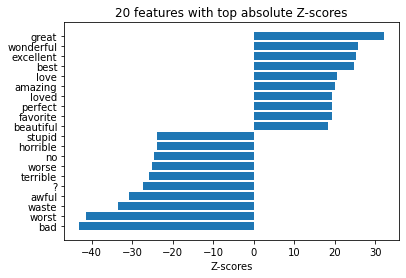

In [212]:
plt.clf()
plt.barh(top_20_words, top_20_Zs, align='center')
plt.xlabel('Z-scores')
plt.title('20 features with top absolute Z-scores')

plt.show()

Perform two-tailed hypothesis testing

In [213]:
p_value = stats.norm.sf(Z_abs)*2
p_value

array([3.93449395e-10, 7.22713896e-43, 2.95181204e-01, ...,
       3.17848801e-02, 6.76595788e-01, 2.52219017e-05])

In [214]:
alpha1 = 0.1
alpha2 = 0.05
alpha3 = 0.01
alpha4 = 0.001
alpha5 = 0.0001
alpha6 = 0.00001
alpha7 = 0.000001
alpha8 = 0.0000001

In [215]:
def hypothesis_testing(alpha, p_val):
  """
  Perform hypothesis testing.
  If p_val < alpha, reject H0, else accept H0.
  Return index of p_val that is less than alpha.
  """
  index = []
  for i in range(len(p_val)):
    if p_val[i] < alpha:
      index.append(i)
  return index

In [216]:
select_ind = np.array(hypothesis_testing(alpha8, p_value))
select_feat = features[select_ind]

In [217]:
# Try to use difference siginificance levels

# select_ind_1 = np.array(hypothesis_testing(alpha5, p_value))
# select_feat_1 = features[select_ind_1]

# select_ind_2= np.array(hypothesis_testing(alpha6, p_value))
# select_feat_2 = features[select_ind_2]

# select_ind_3= np.array(hypothesis_testing(alpha7, p_value))
# select_feat_3 = features[select_ind_3]

In [218]:
def get_df_imdb(X, select_feat, ds, name = np.array(imdb_vocab)):
  """
  Merge the selected features with the label_true together.
  """
  X_filt = X[:,select_feat]
  feat_ds = X_filt.toarray()
  colname = name[select_feat]
  feat_ds = pd.DataFrame(feat_ds, columns = colname)
  frames = [ds, feat_ds]
  df = pd.concat(frames, axis=1, join='inner')
  return df

In [219]:
train_imdb = get_df_imdb(train_X_imdb, select_feat, train_imdb)
del train_imdb["text"]

In [220]:
# train_imdb_1 = get_df_imdb(train_X_imdb, select_feat_1, train_imdb)
# del train_imdb_1["text"]
# train_imdb_1

In [221]:
# train_imdb_2 = get_df_imdb(train_X_imdb, select_feat_2, train_imdb)
# del train_imdb_2["text"]
# train_imdb_2

In [222]:
# train_imdb_3 = get_df_imdb(train_X_imdb, select_feat_3, train_imdb)
# del train_imdb_3["text"]
# train_imdb_3

In [223]:
train_imdb_shuffled = train_imdb.sample(frac=1).reset_index()
del train_imdb_shuffled["index"]
train_imdb_shuffled

,label_true,he,his,by,who,they,from,so,like,there,...,sucks,vhs,finest,delightful,rubbish,loving,terribly,bland,witty,below
0,1,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,6.0,6.0,0.0,2.0,3.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0,4.0,1.0,1.0,1.0,14.0,0.0,6.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [224]:
# train_imdb_shuffled_1 = train_imdb_1.sample(frac=1).reset_index()
# del train_imdb_shuffled_1["index"]
# train_imdb_shuffled_1
#25000*779

In [225]:
# train_imdb_shuffled_2 = train_imdb_2.sample(frac=1).reset_index()
# del train_imdb_shuffled_2["index"]
# train_imdb_shuffled_2
#25000*685

In [226]:
# train_imdb_shuffled_3 = train_imdb_3.sample(frac=1).reset_index()
# del train_imdb_shuffled_3["index"]
# train_imdb_shuffled_3
#25000*596

In [227]:
test_imdb = get_df_imdb(test_X_imdb, select_feat, test_imdb)
del test_imdb["text"]

In [228]:
# test_imdb_1 = get_df_imdb(test_X_imdb, select_feat_1, test_imdb)
# del test_imdb_1["text"]

In [229]:
# test_imdb_2 = get_df_imdb(test_X_imdb, select_feat_2, test_imdb)
# del test_imdb_2["text"]

In [230]:
# test_imdb_3 = get_df_imdb(test_X_imdb, select_feat_3, test_imdb)
# del test_imdb_3["text"]

In [231]:
test_imdb_shuffled = test_imdb.sample(frac=1).reset_index()
del test_imdb_shuffled["index"]
test_imdb_shuffled

,label_true,he,his,by,who,they,from,so,like,there,...,sucks,vhs,finest,delightful,rubbish,loving,terribly,bland,witty,below
0,1,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,1.0,0.0,0.0,4.0,5.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,1,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [232]:
# test_imdb_shuffled_1 = test_imdb_1.sample(frac=1).reset_index()
# del test_imdb_shuffled_1["index"]
# test_imdb_shuffled_1
#25000*779

In [233]:
# test_imdb_shuffled_2 = test_imdb_2.sample(frac=1).reset_index()
# del test_imdb_shuffled_2["index"]
# test_imdb_shuffled_2
#25000*685

In [234]:
# test_imdb_shuffled_3 = test_imdb_3.sample(frac=1).reset_index()
# del test_imdb_shuffled_3["index"]
# test_imdb_shuffled_3
#25000*596

After prforming the hypothesis testing, we are left with 519 features with significance level = 0.0000001. These 519 features are statistically significant to the Y variable which is the class labels.

We also test for other significance level, we got 779 features with significance level 0.0001; 
685 features with significance level = 0.00001;
596 features with significance level = 0.000001;


### Class distribution

train set - 12500 data from class 1 and 12500 data from class 0

Text(0.5, 0, 'Class')

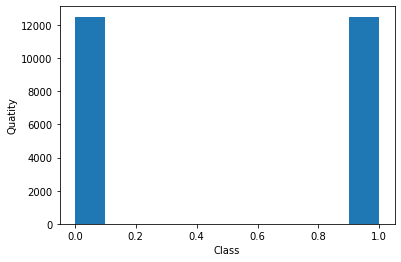

In [235]:
plt.hist(train_imdb_shuffled["label_true"].to_numpy())
plt.ylabel('Quatity')
plt.xlabel('Class')

test set - 12500 data from class 1 and 12500 data from class 0

Text(0.5, 0, 'Class')

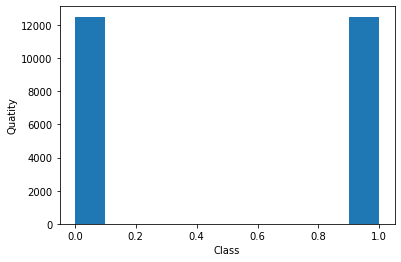

In [236]:
plt.hist(test_imdb_shuffled["label_true"].to_numpy())
plt.ylabel('Quatity')
plt.xlabel('Class')

Class 0 and Class 1 have equal number of data points.

## Task 1.2 20 news groups: a multi-class labelled textual dataset

In [237]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import mutual_info_score
categories = ['comp.graphics', 'rec.sport.hockey','sci.med', 'soc.religion.christian']
train_20_ds = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_20_ds = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [238]:
train_20_text = pd.Series(np.array(train_20_ds.data), name = "text")
train_20_target = pd.Series(np.array(train_20_ds.target), name = "label_target")
train_20 = pd.concat([train_20_target, train_20_text], axis = 1, join = "inner")

In [239]:
train_20

,label_target,text
0,2,From: med50003@nusunix1.nus.sg (WANSAICHEONG K...
1,3,From: tas@pegasus.com (Len Howard)\nSubject: R...
2,0,From: bates@spica.ucsb.edu (Andrew M. Bates)\n...
3,2,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...
4,0,From: Ivanov Sergey <serge@argus.msk.su>\nSubj...
...,...,...
2372,0,"From: haston@utkvx.utk.edu (Haston, Donald Way..."
2373,1,From: patchman@lion.WPI.EDU (Peter Bruce Harpe...
2374,2,From: ron.roth@rose.com (ron roth)\nSubject: S...
2375,1,From: c5ff@jupiter.sun.csd.unb.ca (COOK Charl...


In [240]:
label_target_train = train_20["label_target"]

In [241]:
test_20_text = pd.Series(np.array(test_20_ds.data), name = "text")
test_20_target = pd.Series(np.array(test_20_ds.target), name = "label_target")
test_20 = pd.concat([test_20_target, test_20_text], axis = 1, join = "inner")

In [242]:
test_20

,label_target,text
0,1,From: mckee@cs.Buffalo.EDU (Douglas McKee)\nSu...
1,2,From: houle@nmt.edu (Paul Houle)\nSubject: Ant...
2,1,From: paul@fugu.Data-IO.COM (Paul Brownlow)\nS...
3,0,From: mpdillon@halcyon.com (Michael Dillon)\nS...
4,0,From: craig@regulus.cognet.ucla.edu (Craig Mor...
...,...,...
1577,0,From: hawks@seq.uncwil.edu (David Hawks)\nSubj...
1578,1,From: v128r82w@ubvmsd.cc.buffalo.edu (Ralph L ...
1579,1,From: mmb@lamar.ColoState.EDU (Michael Burger)...
1580,1,From: jack.petrilli@rose.com (jack petrilli)\n...


In [243]:
label_target_test = test_20["label_target"]

In [244]:
count_vect_1 = CountVectorizer()
X_train_counts = count_vect_1.fit_transform(train_20_ds.data)
count_vect_2 = CountVectorizer()
X_test_counts = count_vect_2.fit_transform(test_20_ds.data)

Find the common features of train and test set

In [245]:
features_20_train = count_vect_1.get_feature_names_out()
features_20_test = count_vect_2.get_feature_names_out()

In [246]:
features_20 = np.intersect1d(features_20_train, features_20_test)

In [247]:
features_20_train_ind = []
for i in range(len(features_20)):
  feat = features_20[i]
  if feat in features_20_train:
    ind = np.where(features_20_train == feat)[0][0]
    features_20_train_ind.append(ind)
  else: continue
features_20_train_ind = np.array(features_20_train_ind)

In [248]:
features_20_test_ind = []
for i in range(len(features_20)):
  feat = features_20[i]
  if feat in features_20_test:
    ind = np.where(features_20_test == feat)[0][0]
    features_20_test_ind.append(ind)
  else: continue
features_20_test_ind = np.array(features_20_test_ind)

In [249]:
features_20_train_ind = features_20_train_ind.astype(int)
features_20_test_ind = features_20_test_ind.astype(int)

In [250]:
X_train_counts = X_train_counts.tocsr()[:,features_20_train_ind]
X_test_counts = X_test_counts.tocsr()[:,features_20_test_ind]

### One-hot Encoding

In [251]:
labels_np_train = train_20["label_target"].to_numpy()
labels_np_test = test_20["label_target"].to_numpy()
# print(labels_np_train)
nClasses = np.max(labels_np_train) + 1
# print(nClasses)
train_Y_20 = np.zeros((labels_np_train.shape[0], nClasses))
# print(train_Y.shape)
test_Y_20 = np.zeros((labels_np_test.shape[0], nClasses))

for i in range(train_Y_20.shape[0]):
  train_Y_20[i,labels_np_train[i]] = 1

for i in range(test_Y_20.shape[0]):
  test_Y_20[i,labels_np_test[i]] = 1

### Rare and Stopwords

In [252]:
appear_20 = X_train_counts.copy()
text, feat = appear_20.nonzero()
appear_20[text, feat] = 1

In [253]:
appear_20 = sum(appear_20[:,])

In [254]:
lower_bound_20 = 0.01 * 2377
upper_bound_20 = 0.5 * 2377
appear_20 = appear_20.multiply(appear_20 >= lower_bound_20)
appear_20 = appear_20.multiply(appear_20 <= upper_bound_20)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/compressed.py:291: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


### Mutual Information for feature selection

In [255]:
# features that exclude rare and stopwords
feat_filt = appear_20.nonzero()[1]
X_train_filt = X_train_counts[:,feat_filt]

In [256]:
def get_mi(label1, label2, feat = feat_filt):
  """
  Calculate MI similarity score for each feature with the Y variable label_target.
  Return a list of MI scores. The feature index of the MI score is the same as the 
  feature index of the input variable label2.
  """
  mi = []
  for i in range(len(feat)):
    label2_d = label2[:,i].toarray().flatten()
    mi_d = mutual_info_score(label1, label2_d)
    #print(mi_d)
    mi.append([feat[i], mi_d])
  return np.array(mi)

Choices of number of selected features

In [257]:
select_num1 = 10
select_num2 = 50
select_num3 = 100

Selected features from the category of comp.graphics (label_target = 0)

In [258]:
Y1 = train_Y_20[:,0]
MI1 = get_mi(Y1, X_train_filt)
MI1 = pd.DataFrame(MI1, columns=["feature_index", "MI"])
MI1 = MI1.sort_values(by = ["MI"], ascending=False)
MI1 = MI1.iloc[0:select_num2]
select_feat_20_1 = MI1["feature_index"].to_numpy().astype(int)
select_feat_20_1

array([ 8796,  9142, 20026, 19847,  7918,  9329,   933,  9744, 18468,
       14012, 14820,  7915,  8684,  8314, 20088,  9309,  4734,  2735,
       18416,  8577, 19899,  9751,  9369, 17228, 19579, 18254,  2226,
       13711,  2444, 18424,  8164, 19560,  9280,  4495,  3208, 19997,
       19600, 10491,  6657, 13939,  4794, 19966,  4881,  4090, 12975,
       11491, 14264, 16239,  3263,  9070])

Selected features from the category of rec.sport.hockey (label_target = 1)

In [259]:
Y2 = train_Y_20[:,1]
MI2 = get_mi(Y2, X_train_filt)
MI2 = pd.DataFrame(MI2, columns=["feature_index", "MI"])
MI2 = MI2.sort_values(by = ["MI"], ascending=False)
MI2 = MI2.iloc[0:select_num2]
select_feat_20_2 = MI2["feature_index"].to_numpy().astype(int)
select_feat_20_2

array([18254,  9369,  8405, 12975, 16571, 14328, 14332,  8407, 18256,
       14336, 20078, 11144, 14335, 18684,  3949, 20098, 14331, 11143,
       15249,  6197, 17529,  5624, 20365,  6224,  7759,  4721,  7752,
        9645, 10332, 13999,  8678,  8684, 14003, 14330,  8672,  3816,
       12503,  8674, 14333, 10493, 20103,  3981, 11207, 16497,  8546,
       16082, 15125,  8077, 13389,  7941])

Selected features from the category of sci.med (label_target = 2)

In [260]:
Y3 = train_Y_20[:,2]
MI3 = get_mi(Y3, X_train_filt)
MI3 = pd.DataFrame(MI3, columns=["feature_index", "MI"])
MI3 = MI3.sort_values(by = ["MI"], ascending=False)
MI3 = MI3.iloc[0:select_num2]
select_feat_20_3 = MI3["feature_index"].to_numpy().astype(int)
select_feat_20_3

array([ 3085,  8724, 14259,  6440, 12041, 16794, 10129,  6587, 12045,
       17072,  8684, 13900,  9162,  6291,  8112, 18825, 18122,  4814,
       16678,  9369,  8405, 18254, 12632,  8113, 19213, 16239, 18127,
        4495, 17962, 13898, 17278, 12033, 12975, 10491,  4491,  4486,
        8796, 14194,  5566,  6589, 16465,  3369,  6970,  9407,  4186,
        9091,  6837,  8407,  4525, 16571])

Selected fratures from the category of soc.religion.christian (label_target = 3)

In [261]:
Y4 = train_Y_20[:,3]
MI4 = get_mi(Y4, X_train_filt)
MI4 = pd.DataFrame(MI4, columns=["feature_index", "MI"])
MI4 = MI4.sort_values(by = ["MI"], ascending=False)
MI4 = MI4.iloc[0:select_num2]
select_feat_20_4 = MI4["feature_index"].to_numpy().astype(int)
select_feat_20_4

array([ 8684, 16239,  4495, 10491,  4491, 13045,  9470,  3369,  4486,
        2841,  4525, 19899,  4494, 14519,  7727,   532,  2612,  4644,
       13605, 14012,  3263, 15621,  8504, 20026,  2735,  9182, 19336,
       16998,  9329, 11300, 18908,  4178, 16532,  9142,  3934, 16391,
       11503,  6578, 18254,  3371,  6520,  3208,  3260,  9369,  2246,
        3254, 15132, 19989, 11742, 19966])

Get the union of the selected features

In [262]:
arr1 = np.union1d(select_feat_20_1, select_feat_20_2)
arr2 = np.union1d(arr1, select_feat_20_3)
select_feat_20 = np.union1d(arr2, select_feat_20_4)

In [263]:
select_feat_20

array([  532,   933,  2226,  2246,  2444,  2612,  2735,  2841,  3085,
        3208,  3254,  3260,  3263,  3369,  3371,  3816,  3934,  3949,
        3981,  4090,  4178,  4186,  4486,  4491,  4494,  4495,  4525,
        4644,  4721,  4734,  4794,  4814,  4881,  5566,  5624,  6197,
        6224,  6291,  6440,  6520,  6578,  6587,  6589,  6657,  6837,
        6970,  7727,  7752,  7759,  7915,  7918,  7941,  8077,  8112,
        8113,  8164,  8314,  8405,  8407,  8504,  8546,  8577,  8672,
        8674,  8678,  8684,  8724,  8796,  9070,  9091,  9142,  9162,
        9182,  9280,  9309,  9329,  9369,  9407,  9470,  9645,  9744,
        9751, 10129, 10332, 10491, 10493, 11143, 11144, 11207, 11300,
       11491, 11503, 11742, 12033, 12041, 12045, 12503, 12632, 12975,
       13045, 13389, 13605, 13711, 13898, 13900, 13939, 13999, 14003,
       14012, 14194, 14259, 14264, 14328, 14330, 14331, 14332, 14333,
       14335, 14336, 14519, 14820, 15125, 15132, 15249, 15621, 16082,
       16239, 16391,

Generate the dataframe

In [264]:
def get_df_20(X, select_feat, ds, name = features_20):
  """
  Merge the selected features with the label_target together.
  """
  X_filt = X[:,select_feat]
  feat_ds = X_filt.toarray()
  colname = name[select_feat]
  feat_ds = pd.DataFrame(feat_ds, columns = colname)
  frames = [ds, feat_ds]
  df = pd.concat(frames, axis=1, join='inner')
  return df

In [265]:
train_20 = get_df_20(X_train_counts, select_feat_20, train_20)
train_X_20 = train_20.drop(['text', 'label_target'], axis=1)

In [266]:
train_X_20

,1993,3d,algorithm,all,animation,apr,as,athos,banks,because,...,we,were,what,when,who,win,windows,wings,winnipeg,year
0,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,3,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,3,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0,0
2373,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2374,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2375,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
train_Y_20

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [268]:
test_20 = get_df_20(X_test_counts, select_feat_20, test_20)
test_X_20 = test_20.drop(['text', 'label_target'], axis=1)
# del test_20["text"]
# del test_20['label_target']

In [269]:
test_X_20

,1993,3d,algorithm,all,animation,apr,as,athos,banks,because,...,we,were,what,when,who,win,windows,wings,winnipeg,year
0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,2,1,1,0,0,0,0
1,0,0,0,0,0,0,2,0,0,2,...,0,0,2,3,0,0,0,0,0,0
2,0,0,0,1,0,0,3,0,0,0,...,0,0,0,2,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0,0,0,0,0,0,3,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1578,0,0,0,3,0,0,2,0,0,0,...,1,0,1,1,1,0,0,1,0,1
1579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1580,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0


In [270]:
test_Y_20

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

### Class distribution

train set

Text(0.5, 0, 'Class')

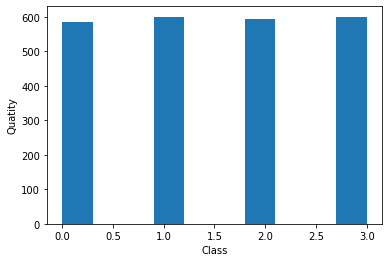

In [271]:
plt.hist(label_target_train.to_numpy())
plt.ylabel('Quatity')
plt.xlabel('Class')

test set

Text(0.5, 0, 'Class')

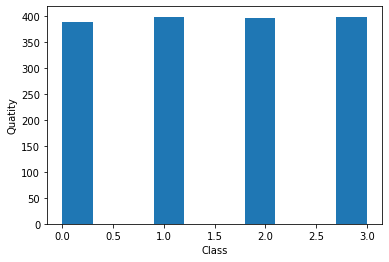

In [272]:
plt.hist(label_target_test.to_numpy())
plt.ylabel('Quatity')
plt.xlabel('Class')

Combine test set and train set together

Text(0.5, 0, 'Class')

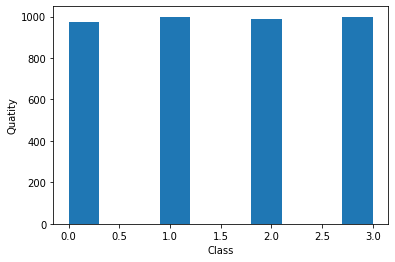

In [273]:
plt.hist(np.concatenate((label_target_test.to_numpy(), label_target_train.to_numpy()), axis=0))
plt.ylabel('Quatity')
plt.xlabel('Class')

# **Task 2: Implement Logistic and Multiclass classifiers**

## Logistic Classifier

In [274]:
logistic = lambda z: 1./ (1 + np.exp(-z))

In [275]:
ce = lambda y, yhat: - y * np.log(yhat) - (1-y) * np.log(1 - yhat)

In [276]:
# cost function
def cost_fn(x, y, w):
  """
  Calculate the loss function of logistic regression
  """
  N, D = x.shape                                                       
  z = np.dot(x, w)
  J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  
  return J

In [277]:
class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
    
    # minimizing the cost using gradient descent
    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

    #check gradient calculation by monitor loss at each iteration
    def check_grad(self, x, y):
      ce_all = np.zeros(int(self.max_iters))
      N, D = x.shape
      w = np.zeros(D)
      w0 = w
      for i in range(int(self.max_iters)):
        a = np.dot(x,w)
        y_hat = logistic(a)
        ce_all[i] = np.sum(ce(y, y_hat)) / N # cross-entropy
        dw = np.dot(x.T, y_hat - y)/N
        w = w - self.learning_rate * dw  
      
      return ce_all

    def small_perturbation(self, x, y):
        np.random.seed(551)
        w0 = self.w
        epsilon = np.random.randn(1)[0] * 1e-5
        w1 = w0 + epsilon
        w2 = w0 - epsilon
        a1 = np.matmul(x, w1)
        a2 = np.matmul(x, w2)
        ce1 = np.sum(y * np.log1p(np.exp(-a1)) + (1-y) * np.log1p(np.exp(a1)))
        ce2 = np.sum(y * np.log1p(np.exp(-a2)) + (1-y) * np.log1p(np.exp(a2)))
        dw_num = (ce1 - ce2)/(2*epsilon) # approximated gradient

        yh = 1/(1+np.exp(-np.matmul(x, w0)))
        dw_cal = np.sum(np.matmul((yh - y),x)) # hand calculated gradient

        # print(dw_cal)
        # print(dw_num)
        return ((dw_cal - dw_num)**2/(dw_cal + dw_num)**2)


## Multiclass Classifier

In [278]:
class Multinomial_logistic:
  def __init__(self, nFeatures, nClasses):
    self.W = np.random.rand(nFeatures, nClasses)

  def predict(self, X):
    # y_pred = np.exp(np.matmul(X, self.W))
    # return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)
    A = np.matmul(X, self.W)
    A_safe = A - np.amax(A, axis=1).reshape(A.shape[0], 1)
    numerator = np.exp(A_safe)
    denominator = np.sum(numerator, axis=1).reshape(numerator.shape[0], 1)
    softmax = numerator / denominator
    return softmax

  def grad(self, X, y):
    return np.matmul(X.transpose(), self.predict(X) - y)

  def ce(self, X, y):
    # print(np.isnan(y * np.log(self.predict(X))).any())
    return -np.sum(y * np.log(self.predict(X)+1e-9))

  def ce_nobias(self, X, y):
    # print(np.isnan(y * np.log(self.predict(X))).any())
    return -np.sum(y * np.log(self.predict(X)))

  def fit(self, X, y, lr=0.005, eps=0.5, niter=50000):
    N, _ = X.shape
    losses_train = np.zeros(niter)
    g = np.inf
    for i in range(niter):
      if (np.linalg.norm(g) <= eps):
        break
      g = self.grad(X, y)
      print(f"gradient norm: {np.linalg.norm(g):.3f}")
      self.W = self.W - lr * g
      loss_train = self.ce(X, y)
      losses_train[i] = loss_train
      print(f"iter {i}: {loss_train:.3f}")
    return losses_train

  def check_grad(self, X, y):
    N, C = y.shape
    D = X.shape[1]

    diff = np.zeros((D, C))

    W = self.W.copy()

    for i in range(D):
      for j in range(C):
        epsilon = np.zeros((D, C))
        epsilon[i, j] = np.random.rand() * 1e-4

        self.W = self.W + epsilon
        J1 = self.ce_nobias(X, y)
        self.W = W

        self.W = self.W - epsilon
        J2 = self.ce_nobias(X, y)
        self.W = W

        numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
        derived_grad = self.grad(X, y)[i, j]

        diff[i, j] = np.square(derived_grad - numeric_grad).sum() / np.square(derived_grad + numeric_grad).sum()

    # print(diff)
    return diff.sum()


# **Task 3: Run experiments**

In [279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import linear_model

## Logisitic Classifier Experiments

In [280]:
models = [KNeighborsClassifier(),
          DecisionTreeClassifier(),
          LogisticRegression()]

perf = {}

In [281]:
train_imdb_numpy = train_imdb_shuffled.to_numpy()
test_imdb_numpy = test_imdb_shuffled.to_numpy()
X_train_imdb_np = np.delete(train_imdb_numpy, 0, 1)

y_train_imdb_np = train_imdb_numpy[:,0]

X_test_imdb_np = np.delete(test_imdb_numpy, 0, 1)
y_test_imdb_np = test_imdb_numpy[:,0]

In [282]:
# train_imdb_numpy_1 = train_imdb_shuffled_1.to_numpy()
# test_imdb_numpy_1 = test_imdb_shuffled_1.to_numpy()
# X_train_imdb_np_1 = np.delete(train_imdb_numpy_1, 0, 1)

# y_train_imdb_np_1 = train_imdb_numpy_1[:,0]

# X_test_imdb_np_1 = np.delete(test_imdb_numpy_1, 0, 1)
# y_test_imdb_np_1 = test_imdb_numpy_1[:,0]

In [283]:
# train_imdb_numpy_2 = train_imdb_shuffled_2.to_numpy()
# test_imdb_numpy_2 = test_imdb_shuffled_2.to_numpy()
# X_train_imdb_np_2 = np.delete(train_imdb_numpy_2, 0, 1)

# y_train_imdb_np_2 = train_imdb_numpy_2[:,0]

# X_test_imdb_np_2 = np.delete(test_imdb_numpy_2, 0, 1)
# y_test_imdb_np_2 = test_imdb_numpy_2[:,0]

In [284]:
# train_imdb_numpy_3 = train_imdb_shuffled_3.to_numpy()
# test_imdb_numpy_3 = test_imdb_shuffled_3.to_numpy()
# X_train_imdb_np_3 = np.delete(train_imdb_numpy_3, 0, 1)

# y_train_imdb_np_3 = train_imdb_numpy_3[:,0]

# X_test_imdb_np_3 = np.delete(test_imdb_numpy_3, 0, 1)
# y_test_imdb_np_3 = test_imdb_numpy_3[:,0]

In [285]:
model = LogisticRegression(verbose=False, add_bias=False)
y_test_pred_imdb = model.fit(X_train_imdb_np,y_train_imdb_np).predict(X_test_imdb_np)
fpr_imdb_logi, tpr_imdb_logi, _ = roc_curve(y_test_imdb_np, y_test_pred_imdb)
auroc_imdb_logi = roc_auc_score(y_test_imdb_np, y_test_pred_imdb)
print(f"AUROC score of logistic classifier is : {auroc_imdb_logi:.3f}")

perf["LogisticRegression (ours)"] = {'fpr':fpr_imdb_logi, 'tpr':tpr_imdb_logi, 'auroc':auroc_imdb_logi}

AUROC score of logistic classifier is : 0.937


In [286]:
# model_1 = LogisticRegression(verbose=False, add_bias=False)
# y_test_pred_imdb = model_1.fit(X_train_imdb_np_1,y_train_imdb_np_1).predict(X_test_imdb_np_1)
# fpr_imdb_logi, tpr_imdb_logi, _ = roc_curve(y_test_imdb_np_1, y_test_pred_imdb)
# auroc_imdb_logi = roc_auc_score(y_test_imdb_np_1, y_test_pred_imdb)
# print(f"AUROC score of logistic classifier (0.0001) is : {auroc_imdb_logi:.3f}")

The AUROC score of logistic classifier (0.0001) is : 0.940

In [287]:
# model_2 = LogisticRegression(verbose=False, add_bias=False)
# y_test_pred_imdb_2 = model_2.fit(X_train_imdb_np_2,y_train_imdb_np_2).predict(X_test_imdb_np_2)
# fpr_imdb_logi, tpr_imdb_logi, _ = roc_curve(y_test_imdb_np_2, y_test_pred_imdb_2)
# auroc_imdb_logi_3 = roc_auc_score(y_test_imdb_np_2, y_test_pred_imdb_2)
# print(f"AUROC score of logistic classifier (0.00001) is : {auroc_imdb_logi:.3f}")

The AUROC score of logistic classifier (0.00001) is 0.940

In [288]:
# model_3 = LogisticRegression(verbose=False, add_bias=False)
# y_test_pred_imdb_3 = model_3.fit(X_train_imdb_np_3,y_train_imdb_np_3).predict(X_test_imdb_np_3)
# fpr_imdb_logi, tpr_imdb_logi, _ = roc_curve(y_test_imdb_np_3, y_test_pred_imdb_3)
# auroc_imdb_logi_3 = roc_auc_score(y_test_imdb_np_3, y_test_pred_imdb_3)
# print(f"AUROC score of logistic classifier (0.000001) is : {auroc_imdb_logi_3:.3f}")

The AUROC score of logistic classifier (0.000001) is 0.939




In [289]:
y_train_pred_imdb = model.predict(X_train_imdb_np)
y_test_pred_imdb = model.predict(X_test_imdb_np)

# threshold probabilities
y_train_pred_imdb = (y_train_pred_imdb > 0.5).astype(int)
y_test_pred_imdb = (y_test_pred_imdb > 0.5).astype(int)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred_imdb==y_train_imdb_np)/len(y_train_imdb_np)
acc_test = sum(y_test_pred_imdb==y_test_imdb_np)/len(y_test_imdb_np)
print(f"train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

train accuracy: 0.877; test accuracy: 0.866


Conclusion: feature selection by altering the significance level did not affect the AUROC score of logistic regression significantly

### KNN Comparison

In [290]:
for i in range(1,21):
    knn_imdb = KNeighborsClassifier(n_neighbors=i)
    y_pred_imdb_knn = knn_imdb.fit(X_train_imdb_np, y_train_imdb_np).predict(X_test_imdb_np)

    fpr_imdb_knn, tpr_imdb_knn, _ = roc_curve(y_test_imdb_np, y_pred_imdb_knn)
    auroc_imdb_knn = roc_auc_score(y_test_imdb_np, y_pred_imdb_knn)
    print (auroc_imdb_knn)

0.62392
0.62368
0.65696
0.6618
0.6783600000000001
0.6803600000000001
0.6837199999999999
0.6917599999999999
0.69156
0.6966800000000001
0.69208
0.7002400000000001
0.6942799999999998
0.7026
0.69736
0.70512
0.7013600000000001
0.7078799999999998
0.70396
0.7122


In [291]:
knn_imdb = KNeighborsClassifier(n_neighbors=15)
y_pred_imdb_knn = knn_imdb.fit(X_train_imdb_np, y_train_imdb_np).predict(X_test_imdb_np)

fpr_imdb_knn, tpr_imdb_knn, _ = roc_curve(y_test_imdb_np, y_pred_imdb_knn)
auroc_imdb_knn = roc_auc_score(y_test_imdb_np, y_pred_imdb_knn)
print(f"AUROC score of KNN is : {auroc_imdb_knn:.3f}")

perf["sklearn KNN"] = {'fpr':fpr_imdb_knn,'tpr':tpr_imdb_knn,'auroc':auroc_imdb_knn}

AUROC score of KNN is : 0.697


### Decision Tree Comparison

In [292]:
for n in range(1,21):
  dt_imdb = DecisionTreeClassifier(max_depth = n)
  y_pred_imdb_dt = dt_imdb.fit(X_train_imdb_np, y_train_imdb_np).predict(X_test_imdb_np)
  
  fpr_imdb_dt, tpr_imdb_dt, _ = roc_curve(y_test_imdb_np, y_pred_imdb_dt)
  auroc_imdb_dt = roc_auc_score(y_test_imdb_np, y_pred_imdb_dt)
  
  print (auroc_imdb_dt)

0.61772
0.655
0.67484
0.6788
0.69252
0.7018
0.71508
0.71832
0.7252000000000001
0.72564
0.72956
0.73436
0.73504
0.73424
0.7376
0.7377199999999999
0.73616
0.73776
0.7342400000000001
0.7345600000000001


In [293]:
dt_imdb = DecisionTreeClassifier(max_depth = 17)
y_pred_imdb_dt = dt_imdb.fit(X_train_imdb_np, y_train_imdb_np).predict(X_test_imdb_np)
  
fpr_imdb_dt, tpr_imdb_dt, _ = roc_curve(y_test_imdb_np, y_pred_imdb_dt)
auroc_imdb_dt = roc_auc_score(y_test_imdb_np, y_pred_imdb_dt)
  
print(f"AUROC score of decision tree is : {auroc_imdb_dt:.3f}")
perf["sklearn Decision Tree"] = {'fpr':fpr_imdb_dt, 'tpr':tpr_imdb_dt, 'auroc':auroc_imdb_dt}

AUROC score of decision tree is : 0.735


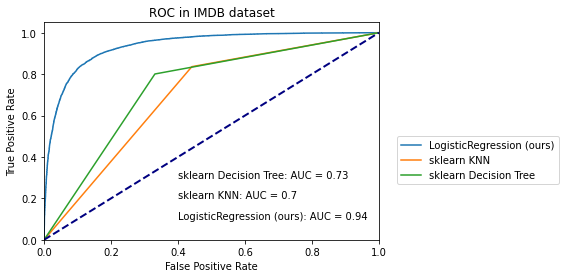

In [294]:
plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in IMDB dataset')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
plt.show()

### Lasso regression Comparison

In [295]:
lasso_imdb = linear_model.Lasso(alpha = 0.1)
y_pred_imdb_lasso = lasso_imdb.fit(X_train_imdb_np,y_train_imdb_np).predict(X_test_imdb_np)
fpr_imdb_lasso, tpr_imdb_lasso, _ = roc_curve(y_test_imdb_np, y_pred_imdb_lasso)
auroc_imdb_lasso = roc_auc_score(y_test_imdb_np, y_pred_imdb_lasso)
print(auroc_imdb_lasso)

0.6726936448


The AUROC score of Lasso classifier is 0.67269.

### Ridge regression Comparison

In [296]:
ridge_imdb = linear_model.Ridge(alpha = 0.1)
y_pred_imdb_ridge = ridge_imdb.fit(X_train_imdb_np,y_train_imdb_np).predict(X_test_imdb_np)
fpr_imdb_ridge, tpr_imdb_ridge, _ = roc_curve(y_test_imdb_np, y_pred_imdb_ridge)
auroc_imdb_ridge = roc_auc_score(y_test_imdb_np, y_pred_imdb_ridge)
print(auroc_imdb_ridge)

0.9339315840000001


The AUROC score of Ridge classifier is 0.93393.

Since Lasso and Ridge regression does not significantly improve the AUROC score for IMDB dataset, we would not compare their AUROC scores with other AUROC.

### Small perturbation

In [297]:
small_pert = model.small_perturbation(X_train_imdb_np,y_train_imdb_np)
small_pert

5.90118748696838e-11

### Convergence Plot

In [298]:
model_imdb1 = LogisticRegression(verbose=True, add_bias=False, learning_rate = 0.01, max_iters = 1000)
ce1 = model_imdb1.check_grad(X_train_imdb_np, y_train_imdb_np)

In [299]:
model_imdb2 = LogisticRegression(verbose=True, add_bias=False, learning_rate = 0.05, max_iters = 1000)
ce2 = model_imdb2.check_grad(X_train_imdb_np, y_train_imdb_np)

In [300]:
model_imdb3 = LogisticRegression(verbose=True, add_bias=False, learning_rate = 0.1, max_iters = 1000)
ce3 = model_imdb3.check_grad(X_train_imdb_np, y_train_imdb_np)

In [301]:
model_imdb4 = LogisticRegression(verbose=True, add_bias=False, learning_rate = 0.5, max_iters = 1000)
ce4 = model_imdb4.check_grad(X_train_imdb_np, y_train_imdb_np)

In [302]:
model_imdb5 = LogisticRegression(verbose=True, add_bias=False, learning_rate = 0.8, max_iters = 1000)
ce5 = model_imdb5.check_grad(X_train_imdb_np, y_train_imdb_np)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

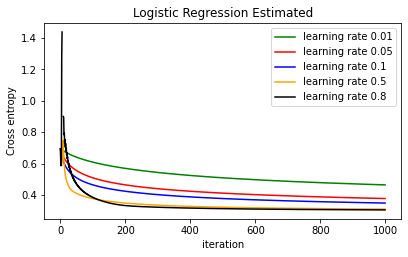

In [303]:
plt.clf()
plt.figure(figsize=((16/9)*3.6,3.6))
plt.plot(ce1,label = "learning rate " + str(0.01), color='green')
plt.plot(ce2,label = "learning rate " + str(0.05), color='red')
plt.plot(ce3,label = "learning rate " + str(0.1), color='blue')
plt.plot(ce4,label = "learning rate " + str(0.5), color='orange')
plt.plot(ce5,label = "learning rate " + str(0.8), color='black')
plt.legend(loc='upper right')
plt.ylabel("Cross entropy")
plt.xlabel("iteration")
plt.title(f"Logistic Regression Estimated")
plt.show()

The convergence plot shows that both learning_rate of 0.1 demonstrates smooth curve and the cross entropy loss decreases faster. And so, we would like to choose learning_rate = 0.1 for further investigation.

### Linear regression used to predict the ratings from IMDB

In [304]:
train_Y_imdb = list(np.array(train_Y_imdb)[:,].flatten())
train_imdb_ratings = train_imdb_shuffled.copy()
train_imdb_ratings["ratings"] = train_Y_imdb
del train_imdb_ratings["label_true"]
train_imdb_ratings

,he,his,by,who,they,from,so,like,there,her,...,vhs,finest,delightful,rubbish,loving,terribly,bland,witty,below,ratings
0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,2.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,6.0,6.0,0.0,2.0,3.0,0.0,3.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24996,4.0,1.0,1.0,1.0,14.0,0.0,6.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24997,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
24998,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [305]:
test_Y_imdb = list(np.array(test_Y_imdb)[:,].flatten())
test_imdb_ratings = test_imdb_shuffled.copy()
test_imdb_ratings["ratings"] = test_Y_imdb
del test_imdb_ratings["label_true"]
test_imdb_ratings

,he,his,by,who,they,from,so,like,there,her,...,vhs,finest,delightful,rubbish,loving,terribly,bland,witty,below,ratings
0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,2.0,1.0,0.0,0.0,4.0,5.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
24996,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
24997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
24998,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Build the linear regression model

In [306]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

In [307]:
train_y_lr = train_imdb_ratings["ratings"].to_numpy()
train_x_lr = train_imdb_ratings.iloc[:,:519].to_numpy()
imdb_linear_reg = LinearRegression()
train_yh = imdb_linear_reg.fit(train_x_lr, train_y_lr).predict(train_x_lr)
train_yh

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


array([5.47556757, 5.27580902, 5.61118398, ..., 5.53157519, 5.3505528 ,
       5.97164056])

In [308]:
for i in range(len(train_yh)):
  r = int(train_yh[i])
  if train_yh[i] - r > 0.5:
    r = r + 1
  train_yh[i] = float(r)
train_yh

array([5., 5., 6., ..., 6., 5., 6.])

Text(0.5, 0, 'Ratings')

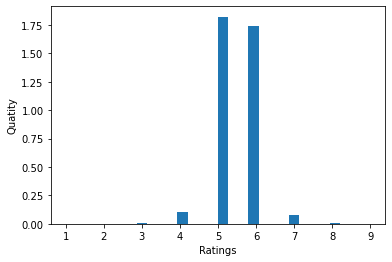

In [309]:
plt.hist(train_yh, density=True, bins=30)  # density=False would make counts
plt.ylabel('Quatity')
plt.xlabel('Ratings')

In [310]:
mean_yh = np.sum(train_yh) / len(train_yh)
mean_yh

5.47796

Text(0.5, 0, 'Ratings')

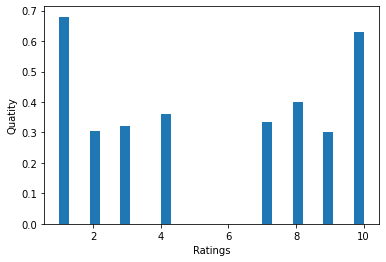

In [311]:
plt.hist(train_y_lr, density=True, bins=30)
plt.ylabel('Quatity')
plt.xlabel('Ratings')

In [312]:
mean_y = np.sum(train_y_lr) / len(train_yh)
mean_y

5.47772

In [313]:
MSE = np.sum(np.power(train_y_lr - train_yh, 2)) / len(train_yh)
MSE

11.8688

The MSE is quite large. This might be due to a large number of extreme values in the true ratings. And so, the linear model does not fit the data well. We could increase the model complexity to improve the predictions.

## Multiclass Classifier Experiments

In [314]:
mult_model = Multinomial_logistic(train_X_20.shape[1], 4)
print(mult_model.check_grad(train_X_20.to_numpy(), train_Y_20))


1.3123531915573596e-13


In [315]:
train_ce_loss = mult_model.fit(train_X_20.to_numpy(), train_Y_20)
Y_pred_20 = mult_model.predict(test_X_20.to_numpy())

Streaming output truncated to the last 5000 lines.
gradient norm: 0.589
iter 8492: 131.268
gradient norm: 0.589
iter 8493: 131.266
gradient norm: 0.589
iter 8494: 131.264
gradient norm: 0.589
iter 8495: 131.263
gradient norm: 0.589
iter 8496: 131.261
gradient norm: 0.589
iter 8497: 131.259
gradient norm: 0.589
iter 8498: 131.257
gradient norm: 0.589
iter 8499: 131.256
gradient norm: 0.589
iter 8500: 131.254
gradient norm: 0.589
iter 8501: 131.252
gradient norm: 0.589
iter 8502: 131.251
gradient norm: 0.589
iter 8503: 131.249
gradient norm: 0.589
iter 8504: 131.247
gradient norm: 0.589
iter 8505: 131.245
gradient norm: 0.589
iter 8506: 131.244
gradient norm: 0.589
iter 8507: 131.242
gradient norm: 0.589
iter 8508: 131.240
gradient norm: 0.589
iter 8509: 131.238
gradient norm: 0.589
iter 8510: 131.237
gradient norm: 0.588
iter 8511: 131.235
gradient norm: 0.588
iter 8512: 131.233
gradient norm: 0.588
iter 8513: 131.231
gradient norm: 0.588
iter 8514: 131.230
gradient norm: 0.588
iter 851

In [316]:
def evaluate(y, y_pred):
  accuracy = sum(y_pred.argmax(axis=1) == y.argmax(axis=1))
  accuracy = accuracy / y.shape[0]
  return accuracy

In [317]:
mult_acc = evaluate(test_Y_20, Y_pred_20)
mult_acc

0.8748419721871049

The accuracy of Multiclass Classifier is 0.874.

In [318]:
train_X_20_num = train_X_20.to_numpy()
test_X_20_num = test_X_20.to_numpy()


In [319]:
train_X_20_num_100 = train_X_20_num[:,0:100]
test_X_20_num_100 = test_X_20_num[:,0:100]

In [320]:
mult_model_100 = Multinomial_logistic(train_X_20_num_100.shape[1], 4)
train_ce_loss = mult_model_100.fit(train_X_20_num_100, train_Y_20)
#print(mult_model.check_grad(train_X_20_num_100, train_Y_20))
Y_pred_20 = mult_model_100.predict(test_X_20_num_100)

Streaming output truncated to the last 5000 lines.
gradient norm: 49.942
iter 1779: 332.419
gradient norm: 49.906
iter 1780: 332.970
gradient norm: 49.878
iter 1781: 332.401
gradient norm: 49.843
iter 1782: 332.951
gradient norm: 49.815
iter 1783: 332.384
gradient norm: 49.779
iter 1784: 332.931
gradient norm: 49.751
iter 1785: 332.367
gradient norm: 49.716
iter 1786: 332.912
gradient norm: 49.688
iter 1787: 332.349
gradient norm: 49.653
iter 1788: 332.893
gradient norm: 49.625
iter 1789: 332.332
gradient norm: 49.590
iter 1790: 332.874
gradient norm: 49.562
iter 1791: 332.315
gradient norm: 49.526
iter 1792: 332.854
gradient norm: 49.499
iter 1793: 332.298
gradient norm: 49.464
iter 1794: 332.835
gradient norm: 49.436
iter 1795: 332.281
gradient norm: 49.401
iter 1796: 332.816
gradient norm: 49.373
iter 1797: 332.263
gradient norm: 49.338
iter 1798: 332.797
gradient norm: 49.310
iter 1799: 332.246
gradient norm: 49.275
iter 1800: 332.778
gradient norm: 49.248
iter 1801: 332.229
gradie

In [321]:
mult_acc = evaluate(test_Y_20, Y_pred_20)
mult_acc

0.8824273072060683

With 100 feature the accuracy of multiclass is 0.883

In [322]:
train_X_20_num_50 = train_X_20_num[:,0:50]
test_X_20_num_50 = test_X_20_num[:,0:50]

In [323]:
mult_model_50 = Multinomial_logistic(train_X_20_num_50.shape[1], 4)
train_ce_loss = mult_model_50.fit(train_X_20_num_50, train_Y_20)
#print(mult_model.check_grad(train_X_20_num_100, train_Y_20))
Y_pred_20 = mult_model_50.predict(test_X_20_num_50)

Streaming output truncated to the last 5000 lines.
gradient norm: 706.448
iter 47500: 1829.303
gradient norm: 853.826
iter 47501: 2068.831
gradient norm: 668.694
iter 47502: 1802.044
gradient norm: 778.086
iter 47503: 2232.041
gradient norm: 681.757
iter 47504: 1546.194
gradient norm: 563.820
iter 47505: 1633.368
gradient norm: 570.588
iter 47506: 1719.955
gradient norm: 744.551
iter 47507: 2041.277
gradient norm: 706.447
iter 47508: 1829.299
gradient norm: 853.827
iter 47509: 2068.830
gradient norm: 668.694
iter 47510: 1802.045
gradient norm: 778.087
iter 47511: 2232.042
gradient norm: 681.757
iter 47512: 1546.194
gradient norm: 563.820
iter 47513: 1633.368
gradient norm: 570.588
iter 47514: 1719.955
gradient norm: 744.550
iter 47515: 2041.273
gradient norm: 706.446
iter 47516: 1829.296
gradient norm: 853.828
iter 47517: 2068.830
gradient norm: 668.694
iter 47518: 1802.046
gradient norm: 778.087
iter 47519: 2232.043
gradient norm: 681.757
iter 47520: 1546.194
gradient norm: 563.821
it

In [324]:
mult_acc = evaluate(test_Y_20, Y_pred_20)
mult_acc

0.7756005056890013

With 50 features the accuracy of multiclass is 0.767




### KNN Comparison

In [325]:
for i in range(1,21):
  knn_20 = KNeighborsClassifier(n_neighbors=i)
  y_pred_20_knn = knn_20.fit(train_X_20.to_numpy(), train_Y_20).predict(test_X_20.to_numpy())
  print(evaluate(test_Y_20, y_pred_20_knn))

0.6852085967130215
0.6061946902654868
0.6801517067003793
0.6125158027812895
0.656763590391909
0.6144121365360303
0.6548672566371682
0.6156763590391909
0.6491782553729456
0.6087231352718079
0.6365360303413401
0.6042983565107459
0.6302149178255373
0.5903919089759798
0.611251580278129
0.5897597977243995
0.6118836915297092
0.5815423514538559
0.5948166877370418
0.5701643489254109


### Decision Tree Comparison

In [326]:
for i in range(1,21):
  dt_20 = DecisionTreeClassifier(max_depth = i)
  y_pred_20_dt = dt_20.fit(train_X_20.to_numpy(), train_Y_20).predict(test_X_20.to_numpy())
  print(evaluate(test_Y_20, y_pred_20_dt))

0.37737041719342607
0.4664981036662453
0.4671302149178255
0.556890012642225
0.5979772439949431
0.618204804045512
0.6238938053097345
0.6245259165613148
0.634007585335019
0.6346396965865992
0.706700379266751
0.7168141592920354
0.7364096080910241
0.7465233881163085
0.7699115044247787
0.786346396965866
0.7926675094816688
0.7857142857142857
0.797724399494311
0.8008849557522124


We can see that neither KNN nor DT gives us results nearly as good as the multiclass regression classifier.

### Lasso regression Comparison

In [327]:
lasso_20 = linear_model.Lasso(alpha = 0.1)
y_pred_20_lasso = lasso_20.fit(train_X_20.to_numpy(),train_Y_20).predict(test_X_20.to_numpy())
print(evaluate(test_Y_20, y_pred_20_lasso))

0.5979772439949431


The test accuracy of Lasso classifier is 0.59798.

### Ridge regression Comparison

In [328]:
ridge_20 = linear_model.Ridge(alpha = 0.1)
y_pred_20_ridge = ridge_20.fit(train_X_20.to_numpy(),train_Y_20).predict(test_X_20.to_numpy())
print(evaluate(test_Y_20, y_pred_20_ridge))

0.7307206068268015


The test accuracy of Ridge classifier is 0.73072.

Similarly, we can see that neither Lasso nor Ridge gives us results nearly as good as the multiclass regression classifier. We would not compare their test accuracies in the latter step.

### Convergence Plot

In [329]:
mult_model1 = Multinomial_logistic(train_X_20.shape[1], 4)
ce_loss1 = mult_model1.fit(train_X_20.to_numpy(), train_Y_20, lr = 0.005, niter = 1000)

gradient norm: 5644.250
iter 0: 20109.233
gradient norm: 5996.683
iter 1: 17759.411
gradient norm: 7564.709
iter 2: 11645.091
gradient norm: 2957.625
iter 3: 4530.187
gradient norm: 1347.375
iter 4: 2200.046
gradient norm: 417.817
iter 5: 1728.611
gradient norm: 290.786
iter 6: 1504.106
gradient norm: 232.678
iter 7: 1353.725
gradient norm: 203.543
iter 8: 1232.383
gradient norm: 185.841
iter 9: 1117.367
gradient norm: 167.611
iter 10: 1025.254
gradient norm: 151.269
iter 11: 939.197
gradient norm: 139.802
iter 12: 860.326
gradient norm: 131.786
iter 13: 791.730
gradient norm: 112.791
iter 14: 736.763
gradient norm: 102.470
iter 15: 691.738
gradient norm: 91.878
iter 16: 655.076
gradient norm: 84.338
iter 17: 624.051
gradient norm: 79.262
iter 18: 596.796
gradient norm: 75.114
iter 19: 573.184
gradient norm: 70.507
iter 20: 553.498
gradient norm: 68.144
iter 21: 538.141
gradient norm: 74.439
iter 22: 526.461
gradient norm: 83.242
iter 23: 516.210
gradient norm: 98.364
iter 24: 511.360


In [330]:
mult_model2 = Multinomial_logistic(train_X_20.shape[1], 4)
ce_loss2 = mult_model2.fit(train_X_20.to_numpy(), train_Y_20, lr = 0.01, niter = 1000)

gradient norm: 4744.085
iter 0: 11721.499
gradient norm: 4052.498
iter 1: 11897.595
gradient norm: 3002.527
iter 2: 8166.812
gradient norm: 2439.436
iter 3: 7724.122
gradient norm: 2420.639
iter 4: 5016.791
gradient norm: 1653.434
iter 5: 4266.185
gradient norm: 1261.018
iter 6: 3312.119
gradient norm: 738.840
iter 7: 1669.913
gradient norm: 353.517
iter 8: 1427.189
gradient norm: 245.192
iter 9: 1189.611
gradient norm: 220.038
iter 10: 1168.265
gradient norm: 203.786
iter 11: 1053.366
gradient norm: 295.068
iter 12: 1204.766
gradient norm: 307.250
iter 13: 965.493
gradient norm: 229.877
iter 14: 892.182
gradient norm: 200.197
iter 15: 835.652
gradient norm: 301.881
iter 16: 1031.081
gradient norm: 314.797
iter 17: 805.397
gradient norm: 297.213
iter 18: 882.829
gradient norm: 302.071
iter 19: 801.485
gradient norm: 396.436
iter 20: 1070.458
gradient norm: 365.332
iter 21: 702.059
gradient norm: 245.922
iter 22: 676.094
gradient norm: 224.774
iter 23: 644.071
gradient norm: 321.597
ite

In [331]:
mult_model3 = Multinomial_logistic(train_X_20.shape[1], 4)
ce_loss3 = mult_model2.fit(train_X_20.to_numpy(), train_Y_20, lr = 0.05, niter = 1000)

gradient norm: 92.711
iter 0: 1392.732
gradient norm: 631.831
iter 1: 12755.831
gradient norm: 3578.529
iter 2: 27990.155
gradient norm: 8214.649
iter 3: 27857.637
gradient norm: 5930.319
iter 4: 27424.340
gradient norm: 7836.885
iter 5: 18061.048
gradient norm: 4592.614
iter 6: 6184.778
gradient norm: 559.546
iter 7: 5102.791
gradient norm: 328.336
iter 8: 4726.530
gradient norm: 293.463
iter 9: 4398.109
gradient norm: 271.173
iter 10: 4010.753
gradient norm: 225.618
iter 11: 3783.335
gradient norm: 207.577
iter 12: 3487.521
gradient norm: 185.871
iter 13: 3282.070
gradient norm: 167.444
iter 14: 3135.350
gradient norm: 159.542
iter 15: 2941.729
gradient norm: 130.871
iter 16: 2821.064
gradient norm: 126.084
iter 17: 2773.304
gradient norm: 123.601
iter 18: 2664.624
gradient norm: 126.837
iter 19: 2719.646
gradient norm: 131.422
iter 20: 2549.987
gradient norm: 132.219
iter 21: 2610.111
gradient norm: 127.448
iter 22: 2455.566
gradient norm: 229.031
iter 23: 2703.328
gradient norm: 23

In [332]:
mult_model4 = Multinomial_logistic(train_X_20.shape[1], 4)
ce_loss4 = mult_model4.fit(train_X_20.to_numpy(), train_Y_20, lr = 0.0001, niter = 1000)

gradient norm: 4918.827
iter 0: 4002.035
gradient norm: 2565.008
iter 1: 3443.566
gradient norm: 1996.084
iter 2: 3084.493
gradient norm: 1690.791
iter 3: 2816.526
gradient norm: 1498.166
iter 4: 2604.484
gradient norm: 1338.422
iter 5: 2433.593
gradient norm: 1219.495
iter 6: 2290.760
gradient norm: 1124.802
iter 7: 2169.000
gradient norm: 1040.591
iter 8: 2064.635
gradient norm: 967.482
iter 9: 1973.983
gradient norm: 907.635
iter 10: 1894.002
gradient norm: 855.314
iter 11: 1822.888
gradient norm: 807.968
iter 12: 1759.364
gradient norm: 764.856
iter 13: 1702.369
gradient norm: 725.908
iter 14: 1650.958
gradient norm: 690.974
iter 15: 1604.313
gradient norm: 659.416
iter 16: 1561.794
gradient norm: 630.374
iter 17: 1522.913
gradient norm: 603.436
iter 18: 1487.251
gradient norm: 578.821
iter 19: 1454.397
gradient norm: 556.652
iter 20: 1423.975
gradient norm: 536.646
iter 21: 1395.670
gradient norm: 518.410
iter 22: 1369.234
gradient norm: 501.617
iter 23: 1344.466
gradient norm: 48

<Figure size 432x288 with 0 Axes>

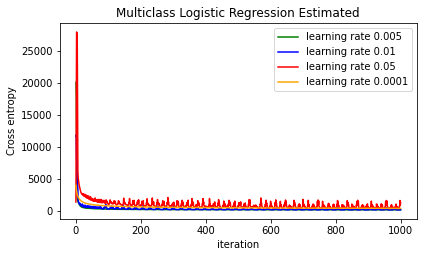

In [333]:
plt.clf()
plt.figure(figsize=((16/9)*3.6,3.6))
plt.plot(ce_loss1,label = "learning rate " + str(0.005), color='green')
plt.plot(ce_loss2,label = "learning rate " + str(0.01), color='blue')
plt.plot(ce_loss3,label = "learning rate " + str(0.05), color='red')
plt.plot(ce_loss4,label = "learning rate " + str(0.0001), color='orange')
plt.legend(loc='upper right')
plt.ylabel("Cross entropy")
plt.xlabel("iteration")
plt.title(f"Multiclass Logistic Regression Estimated")
plt.show()

The convergence plot shows that both learning_rate of 0.005 and learning rate of 0.0001 demonstrates smooth curve. We would like to choose learning_rate = 0.005 for further investigation since it takes less running time.

## Task 3.1 Accuracy of Models with respect to dataset size

In [334]:
def random_part_of_data(dataset_size, part_fraction):
  part_size = round(dataset_size * part_fraction)
  part_indices = random.sample(range(0, dataset_size), part_size)
  return part_indices

### Logistic classifier and KNN classifier

20% train dataset

In [335]:
X_train_imdb_20_ind = random_part_of_data(train_imdb_numpy.shape[0], 0.2)
train_imdb_20 = train_imdb_numpy[X_train_imdb_20_ind]
X_train_imdb_20 = np.delete(train_imdb_20, 0, 1)
y_train_imdb_20 = train_imdb_20[:,0]

In [336]:
model_imdb_20 = LogisticRegression(verbose=True, add_bias=False)
y_test_pred_imdb_20 = model_imdb_20.fit(X_train_imdb_20,y_train_imdb_20).predict(X_test_imdb_np)
fpr_20, tpr_20, _ = roc_curve(y_test_imdb_np, y_test_pred_imdb_20)
auroc_imdb_logi_20 = roc_auc_score(y_test_imdb_np, y_test_pred_imdb_20)
print(auroc_imdb_logi_20)

terminated after 100000 iterations, with norm of the gradient equal to 0.00012284161850978495
the weight found: [ 4.44607174e-02 -7.65005768e-03 -9.97115191e-02 -7.22574029e-02
 -5.66568350e-03 -1.58458808e-01  8.74506935e-02  2.08634245e-02
  4.33767895e-02  6.12675399e-02 -4.20082533e-02 -4.14031351e-02
  1.99065961e-01  1.05837800e-01 -1.60334052e-01  1.25491103e-01
  1.23771871e-01  1.80432870e-01 -1.63607009e-01 -2.01424173e-01
 -7.53699788e-02 -9.12932315e-02  1.44853496e-01  6.34110244e-02
  5.50845571e-02  4.48024121e-01 -2.66564956e-01  1.93100243e-01
  1.44673627e-01 -4.55911099e-01  1.40286834e-01 -3.34363984e-02
  1.79559197e-01  8.89984491e-01  1.07610686e-01  3.52891545e-03
 -7.77923615e-02  2.37620566e-03 -1.37660206e-02 -3.78489377e-01
 -2.08387597e-01 -1.39182419e-02  1.31795052e-01  4.33562462e-02
  5.18743816e-03 -7.10386479e-03 -1.55747022e-01 -2.16794623e-01
  8.22872915e-02  5.78945761e-01  2.36827763e-01 -2.57040940e-01
  8.29327545e-02 -3.39944522e-01 -9.0991181

The AUROC score of logistic classifier using 20% train dataset is 0.916.

In [337]:
y_train_pred_imdb = model_imdb_20.predict(X_train_imdb_np)
y_test_pred_imdb = model_imdb_20.predict(X_test_imdb_np)

# threshold probabilities
y_train_pred_imdb = (y_train_pred_imdb > 0.5).astype(int)
y_test_pred_imdb = (y_test_pred_imdb > 0.5).astype(int)

# accuracy = correctly classified / total classified
acc_train_imdb = sum(y_train_pred_imdb==y_train_imdb_np)/len(y_train_imdb_np)
acc_test_imdb = sum(y_test_pred_imdb==y_test_imdb_np)/len(y_test_imdb_np)
print(f"train accuracy: {acc_train_imdb:.3f}; test accuracy: {acc_test_imdb:.3f}")

train accuracy: 0.854; test accuracy: 0.840


The test accuracy of logistic classifier using 20% train dataset is 0.840

In [338]:
for i in range(1,11):
    knn_imdb = KNeighborsClassifier(n_neighbors=i)
    y_pred_imdb_knn = knn_imdb.fit(X_train_imdb_20, y_train_imdb_20).predict(X_test_imdb_np)

    fpr_imdb_knn, tpr_imdb_knn, _ = roc_curve(y_test_imdb_np, y_pred_imdb_knn)
    auroc_imdb_knn = roc_auc_score(y_test_imdb_np, y_pred_imdb_knn)

    print(f"auroc score: {auroc_imdb_knn:.3f}")

auroc score: 0.606
auroc score: 0.605
auroc score: 0.638
auroc score: 0.641
auroc score: 0.654
auroc score: 0.660
auroc score: 0.663
auroc score: 0.669
auroc score: 0.666
auroc score: 0.677


The AUROC score of KNN classifier for 20% dataset is 0.680 when K = 10.

In [339]:
for n in range(1,20):
  dt_imdb = DecisionTreeClassifier(max_depth = n)
  y_pred_imdb_dt = dt_imdb.fit(X_train_imdb_20, y_train_imdb_20).predict(X_test_imdb_np)
  
  fpr_imdb_dt, tpr_imdb_dt, _ = roc_curve(y_test_imdb_np, y_pred_imdb_dt)
  auroc_imdb_dt = roc_auc_score(y_test_imdb_np, y_pred_imdb_dt)
  
  print (auroc_imdb_dt)

0.61772
0.655
0.6699999999999999
0.68748
0.7029999999999998
0.70028
0.7008399999999999
0.7082799999999999
0.70856
0.71468
0.71804
0.7206400000000001
0.72016
0.72092
0.72208
0.7218
0.7166
0.71676
0.7150800000000002


The AUROC score of Decision Tree classifier for 20% dataset is 0.720 when max_depth = 16.

40% train dataset

In [340]:
X_train_imdb_40_ind = random_part_of_data(train_imdb_numpy.shape[0], 0.4)
train_imdb_40 = train_imdb_numpy[X_train_imdb_40_ind]
X_train_imdb_40 = np.delete(train_imdb_40, 0, 1)
y_train_imdb_40 = train_imdb_40[:,0]

model_imdb_40 = LogisticRegression(verbose=True, add_bias=False)
y_test_pred_imdb_40 = model_imdb_40.fit(X_train_imdb_40,y_train_imdb_40).predict(X_test_imdb_np)
fpr_40, tpr_40, _ = roc_curve(y_test_imdb_np, y_test_pred_imdb_40)
auroc_imdb_logi_40 = roc_auc_score(y_test_imdb_np, y_test_pred_imdb_40)
print(auroc_imdb_logi_40)

terminated after 67323 iterations, with norm of the gradient equal to 9.999985718604835e-05
the weight found: [ 2.20143179e-02 -4.51470304e-02 -1.15751987e-01  5.43676996e-02
  1.90518679e-03 -1.49117085e-02  2.26751911e-02 -3.52857930e-02
 -7.44481516e-02 -1.34042315e-02 -1.76112752e-03 -1.05060092e-01
  8.66025499e-02  4.75896546e-02 -2.39239645e-01  4.86683177e-02
  9.81476402e-02  7.20845662e-02 -1.53294957e-01 -1.61472940e-01
 -1.06886943e-01 -8.68299314e-02 -2.10189950e-02 -5.18929414e-02
  4.68854666e-03  3.07395956e-01 -8.28795376e-02  1.75598691e-01
  2.08705457e-01 -4.16763326e-01  1.55065351e-01  1.34395711e-02
  9.10457134e-03  5.17328130e-01  1.17014841e-01  1.94426240e-01
 -3.90692179e-02  5.91745095e-03 -1.11401390e-02 -1.92058951e-01
 -7.73555931e-02 -1.50085409e-01 -1.77482021e-01  8.15292041e-02
 -5.27503164e-02  1.61075413e-01 -1.07990811e-01 -2.56873824e-01
  3.03383557e-01  5.63364017e-01  1.43658829e-01 -4.23598895e-02
  1.46813123e-01 -6.53872251e-02  1.38294107e

The AUROC score of logistic classifier using 40% train dataset is 0.929.

In [341]:
y_train_pred_imdb = model_imdb_40.predict(X_train_imdb_np)
y_test_pred_imdb = model_imdb_40.predict(X_test_imdb_np)

# threshold probabilities
y_train_pred_imdb = (y_train_pred_imdb > 0.5).astype(int)
y_test_pred_imdb = (y_test_pred_imdb > 0.5).astype(int)

# accuracy = correctly classified / total classified
acc_train_imdb = sum(y_train_pred_imdb==y_train_imdb_np)/len(y_train_imdb_np)
acc_test_imdb = sum(y_test_pred_imdb==y_test_imdb_np)/len(y_test_imdb_np)
print(f"train accuracy: {acc_train_imdb:.3f}; test accuracy: {acc_test_imdb:.3f}")

train accuracy: 0.864; test accuracy: 0.855


The test accuracy of logistic classifier using 40% train dataset is 0.856.

In [342]:
for i in range(1,11):
    knn_imdb = KNeighborsClassifier(n_neighbors=i)
    y_pred_imdb_knn = knn_imdb.fit(X_train_imdb_40, y_train_imdb_40).predict(X_test_imdb_np)

    fpr_imdb_knn, tpr_imdb_knn, _ = roc_curve(y_test_imdb_np, y_pred_imdb_knn)
    auroc_imdb_knn = roc_auc_score(y_test_imdb_np, y_pred_imdb_knn)

    print(f"auroc score: {auroc_imdb_knn:.3f}")

auroc score: 0.620
auroc score: 0.628
auroc score: 0.643
auroc score: 0.656
auroc score: 0.654
auroc score: 0.667
auroc score: 0.661
auroc score: 0.672
auroc score: 0.666
auroc score: 0.677


The AUROC score of KNN classifier using 40% train dataset is 0.679 when K = 10.

In [343]:
for n in range(1,20):
  dt_imdb = DecisionTreeClassifier(max_depth = n)
  y_pred_imdb_dt = dt_imdb.fit(X_train_imdb_40, y_train_imdb_40).predict(X_test_imdb_np)
  
  fpr_imdb_dt, tpr_imdb_dt, _ = roc_curve(y_test_imdb_np, y_pred_imdb_dt)
  auroc_imdb_dt = roc_auc_score(y_test_imdb_np, y_pred_imdb_dt)
  
  print (auroc_imdb_dt)

0.61772
0.655
0.67904
0.67884
0.68996
0.7020000000000001
0.70936
0.7148399999999999
0.71756
0.7233200000000001
0.7248399999999999
0.72816
0.7271200000000001
0.7276
0.72656
0.72344
0.7207199999999999
0.7229599999999999
0.72176


The AUROC score of Decision Tree classifier for 40% dataset is 0.727 when max_depth = 15.

60% train dataset

In [344]:
X_train_imdb_60_ind = random_part_of_data(train_imdb_numpy.shape[0], 0.6)
train_imdb_60 = train_imdb_numpy[X_train_imdb_60_ind]
X_train_imdb_60 = np.delete(train_imdb_60, 0, 1)
y_train_imdb_60 = train_imdb_60[:,0]

model_imdb_60 = LogisticRegression(verbose=True, add_bias=False)
y_test_pred_imdb_60 = model_imdb_60.fit(X_train_imdb_60,y_train_imdb_60).predict(X_test_imdb_np)
fpr_60, tpr_60, _ = roc_curve(y_test_imdb_np, y_test_pred_imdb_60)
auroc_imdb_logi_60 = roc_auc_score(y_test_imdb_np, y_test_pred_imdb_60)
print(auroc_imdb_logi_60)

terminated after 60567 iterations, with norm of the gradient equal to 9.999665951376648e-05
the weight found: [ 2.56208169e-02 -3.55768155e-02 -8.10710222e-02  1.42479329e-02
  4.60314730e-03  2.47034144e-02  1.35282178e-02 -7.07975537e-03
 -7.14277853e-03 -1.40862953e-04 -5.40747178e-03 -1.05387768e-01
  8.26307855e-03  2.73246831e-02 -1.83532680e-01  2.23234100e-02
  6.53123747e-02  1.31776731e-01 -2.13649107e-01 -1.94841974e-01
 -1.42184727e-01 -1.63905341e-01  1.05655628e-01  2.88639691e-02
 -4.18131421e-02  2.29799732e-01 -7.02701310e-02  1.63951652e-01
  8.83768046e-02 -3.98686722e-01  1.20547982e-01 -7.78604424e-03
  7.06291259e-02  5.82319859e-01  1.23158651e-01  1.73324336e-01
  1.80363521e-02  7.17204539e-02  1.17040803e-02 -1.34994820e-01
 -8.26916438e-02 -1.14695764e-01 -1.41008359e-01 -6.62115618e-02
  2.00762473e-03  1.80897177e-01 -1.15562773e-01 -1.49694238e-01
  1.69094792e-01  5.10476688e-01  2.08995737e-01 -5.08452455e-02
  1.22560543e-01 -1.49207740e-01 -1.51644009e

The AUROC score of logistic classifier using 60% train dataset is 0.933.

In [345]:
y_train_pred_imdb = model_imdb_60.predict(X_train_imdb_np)
y_test_pred_imdb = model_imdb_60.predict(X_test_imdb_np)

# threshold probabilities
y_train_pred_imdb = (y_train_pred_imdb > 0.5).astype(int)
y_test_pred_imdb = (y_test_pred_imdb > 0.5).astype(int)

# accuracy = correctly classified / total classified
acc_train_imdb = sum(y_train_pred_imdb==y_train_imdb_np)/len(y_train_imdb_np)
acc_test_imdb = sum(y_test_pred_imdb==y_test_imdb_np)/len(y_test_imdb_np)
print(f"train accuracy: {acc_train_imdb:.3f}; test accuracy: {acc_test_imdb:.3f}")

train accuracy: 0.872; test accuracy: 0.862


The test accuracy of logistic classifier using 60% train dataset is 0.862.

In [346]:
for i in range(1,11):
    knn_imdb = KNeighborsClassifier(n_neighbors=i)
    y_pred_imdb_knn = knn_imdb.fit(X_train_imdb_60, y_train_imdb_60).predict(X_test_imdb_np)

    fpr_imdb_knn, tpr_imdb_knn, _ = roc_curve(y_test_imdb_np, y_pred_imdb_knn)
    auroc_imdb_knn = roc_auc_score(y_test_imdb_np, y_pred_imdb_knn)

    print(f"auroc score: {auroc_imdb_knn:.3f}")

auroc score: 0.613
auroc score: 0.608
auroc score: 0.641
auroc score: 0.645
auroc score: 0.659
auroc score: 0.666
auroc score: 0.672
auroc score: 0.678
auroc score: 0.681
auroc score: 0.687


The AUROC score of KNN classifier using 60% train dataset is 0.687 when K = 10.

In [347]:
for n in range(1,20):
  dt_imdb = DecisionTreeClassifier(max_depth = n)
  y_pred_imdb_dt = dt_imdb.fit(X_train_imdb_60, y_train_imdb_60).predict(X_test_imdb_np)
  
  fpr_imdb_dt, tpr_imdb_dt, _ = roc_curve(y_test_imdb_np, y_pred_imdb_dt)
  auroc_imdb_dt = roc_auc_score(y_test_imdb_np, y_pred_imdb_dt)
  
  print (auroc_imdb_dt)

0.61772
0.655
0.67408
0.6777199999999999
0.6924
0.70612
0.70896
0.70824
0.72068
0.7233200000000001
0.72868
0.73128
0.7306400000000001
0.7315200000000002
0.73264
0.7332
0.72736
0.7315600000000001
0.72984


The AUROC score of Decision Tree classifier for 60% dataset is 0.734 when max_depth = 15.

80% train dataset

In [348]:
X_train_imdb_80_ind = random_part_of_data(train_imdb_numpy.shape[0], 0.8)
train_imdb_80 = train_imdb_numpy[X_train_imdb_80_ind]
X_train_imdb_80 = np.delete(train_imdb_80, 0, 1)
y_train_imdb_80 = train_imdb_80[:,0]

model_imdb_80 = LogisticRegression(verbose=True, add_bias=False)
y_test_pred_imdb_80 = model_imdb_80.fit(X_train_imdb_80,y_train_imdb_80).predict(X_test_imdb_np)
fpr_80, tpr_80, _ = roc_curve(y_test_imdb_np, y_test_pred_imdb_80)
auroc_imdb_logi_80 = roc_auc_score(y_test_imdb_np, y_test_pred_imdb_80)
print(auroc_imdb_logi_80)

terminated after 56375 iterations, with norm of the gradient equal to 9.999590202278086e-05
the weight found: [ 2.31037223e-02 -8.12347384e-03 -8.78646329e-02  1.62535084e-02
 -1.74941086e-02 -1.15810299e-02  3.74749884e-02  1.68142419e-02
 -2.69111337e-02  1.12068259e-02 -2.73114191e-03 -7.98779296e-02
  1.13073831e-02  5.51657668e-02 -1.78974330e-01  2.53482922e-02
  5.00290433e-02  1.44557813e-01 -1.91074294e-01 -1.63957535e-01
 -1.27675496e-01 -1.28662501e-01  6.29116105e-02  6.86627149e-04
 -3.69653416e-02  2.42019690e-01 -8.52341012e-02  1.64022735e-01
  1.49690671e-01 -4.04870183e-01  1.46522616e-01  1.21280995e-02
  2.48663137e-02  5.36465243e-01  1.11552085e-01  1.27399352e-01
 -1.12356641e-02  7.56304783e-02  3.03529231e-02 -1.14379739e-01
 -1.22848225e-01 -8.82938939e-02 -1.71806681e-01  2.50481917e-02
  3.03958987e-02  3.83268700e-02 -9.80820436e-02 -1.37844721e-01
  1.58987186e-01  4.70400067e-01  1.24753172e-01 -3.95009935e-02
  1.58740013e-01 -1.50590434e-01  3.94734841e

The AUROC score of logistic classifier using 80% train dataset is 0.936.

In [349]:
y_train_pred_imdb = model_imdb_80.predict(X_train_imdb_np)
y_test_pred_imdb = model_imdb_80.predict(X_test_imdb_np)

# threshold probabilities
y_train_pred_imdb = (y_train_pred_imdb > 0.5).astype(int)
y_test_pred_imdb = (y_test_pred_imdb > 0.5).astype(int)

# accuracy = correctly classified / total classified
acc_train_imdb = sum(y_train_pred_imdb==y_train_imdb_np)/len(y_train_imdb_np)
acc_test_imdb = sum(y_test_pred_imdb==y_test_imdb_np)/len(y_test_imdb_np)
print(f"train accuracy: {acc_train_imdb:.3f}; test accuracy: {acc_test_imdb:.3f}")

train accuracy: 0.875; test accuracy: 0.864


The test accuracy of logistic classifier using 80% train dataset is 0.865.

In [350]:
for i in range(1,11):
    knn_imdb = KNeighborsClassifier(n_neighbors=i)
    y_pred_imdb_knn = knn_imdb.fit(X_train_imdb_80, y_train_imdb_80).predict(X_test_imdb_np)

    fpr_imdb_knn, tpr_imdb_knn, _ = roc_curve(y_test_imdb_np, y_pred_imdb_knn)
    auroc_imdb_knn = roc_auc_score(y_test_imdb_np, y_pred_imdb_knn)

    print(f"auroc score: {auroc_imdb_knn:.3f}")

auroc score: 0.625
auroc score: 0.624
auroc score: 0.652
auroc score: 0.659
auroc score: 0.670
auroc score: 0.677
auroc score: 0.676
auroc score: 0.687
auroc score: 0.685
auroc score: 0.694


The AUROC score of KNN classifier using 80% train dataset is 0.694 when K = 10.

In [351]:
for n in range(1,20):
  dt_imdb = DecisionTreeClassifier(max_depth = n)
  y_pred_imdb_dt = dt_imdb.fit(X_train_imdb_80, y_train_imdb_80).predict(X_test_imdb_np)
  
  fpr_imdb_dt, tpr_imdb_dt, _ = roc_curve(y_test_imdb_np, y_pred_imdb_dt)
  auroc_imdb_dt = roc_auc_score(y_test_imdb_np, y_pred_imdb_dt)
  
  print (auroc_imdb_dt)

0.61772
0.655
0.67392
0.6790400000000001
0.69312
0.7008000000000001
0.7179199999999999
0.7192800000000001
0.7248799999999999
0.7240800000000001
0.7258399999999999
0.7262799999999999
0.7282
0.7264799999999999
0.72648
0.73032
0.7314399999999999
0.72944
0.72952


The AUROC score of Decision Tree classifier for 80% dataset is 0.733 when max_depth = 16.

### Plot of AUROC score for logistic regression vs KNN vs DT







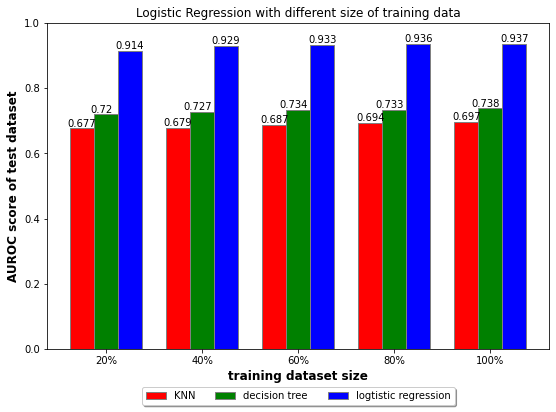

In [352]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(9, 6))
 
# set height of bar
KNN = [0.677,0.679,0.687,0.694,0.697]
logtistic = [0.914,0.929,0.933,0.936,0.937]
DT = [0.720,0.727,0.734,0.733,0.738]
 
# Set position of bar on X axis
br1 = np.arange(len(KNN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, KNN, color ='r', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br2, DT, color ='g', width = barWidth,
        edgecolor ='grey', label ='decision tree')
plt.bar(br3, logtistic, color ='b', width = barWidth,
        edgecolor ='grey', label ='logtistic regression')
 
# Adding Xticks
plt.title(f"Logistic Regression with different size of training data")
plt.xlabel('training dataset size', fontweight ='bold', fontsize = 12)
plt.ylim(0,1)
plt.ylabel('AUROC score of test dataset', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(KNN))],
        ['20%', '40%', '60%', '80%', '100%'])
for i in range (len(br1)):
   plt.text(i,KNN[i],KNN[i],ha = 'center',va='bottom')

for j in range (len(br2)):
    plt.text(j+0.2,DT[j],DT[j],ha = 'center',va='bottom')

for k in range (len(br3)):
    plt.text(k+0.5,logtistic[k],logtistic[k],ha = 'center',va='bottom')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

### Multiclass classifier and KNN classifier

In [353]:
train_X_20_np = train_X_20.to_numpy()
train_Y_20_np = train_Y_20

test_X_20_np = test_X_20.to_numpy()
test_Y_20_np = test_Y_20


20% train dataset

In [354]:
train_20_20_ind = random_part_of_data(train_X_20_np.shape[0], 0.2)
train_X_20_20 = train_X_20_np[train_20_20_ind]
train_Y_20_20 = train_Y_20_np[train_20_20_ind]

In [355]:
mult_model = Multinomial_logistic(train_X_20_20.shape[1], 4)
train_ce_loss = mult_model.fit(train_X_20_20, train_Y_20_20)
#print(mult_model.check_grad(train_X_20_20, train_Y_20_20))
Y_pred_20_20 = mult_model.predict(test_X_20_np)

Streaming output truncated to the last 5000 lines.
gradient norm: 1.086
iter 1447: 14.263
gradient norm: 1.086
iter 1448: 14.258
gradient norm: 1.085
iter 1449: 14.252
gradient norm: 1.085
iter 1450: 14.246
gradient norm: 1.084
iter 1451: 14.240
gradient norm: 1.084
iter 1452: 14.234
gradient norm: 1.083
iter 1453: 14.228
gradient norm: 1.083
iter 1454: 14.222
gradient norm: 1.082
iter 1455: 14.216
gradient norm: 1.082
iter 1456: 14.211
gradient norm: 1.081
iter 1457: 14.205
gradient norm: 1.081
iter 1458: 14.199
gradient norm: 1.080
iter 1459: 14.193
gradient norm: 1.080
iter 1460: 14.187
gradient norm: 1.079
iter 1461: 14.181
gradient norm: 1.078
iter 1462: 14.176
gradient norm: 1.078
iter 1463: 14.170
gradient norm: 1.077
iter 1464: 14.164
gradient norm: 1.077
iter 1465: 14.158
gradient norm: 1.076
iter 1466: 14.152
gradient norm: 1.076
iter 1467: 14.147
gradient norm: 1.075
iter 1468: 14.141
gradient norm: 1.075
iter 1469: 14.135
gradient norm: 1.074
iter 1470: 14.129
gradient norm

In [356]:
mult_acc = evaluate(test_Y_20, Y_pred_20_20)
mult_acc

0.8128950695322377

Accuracy of Multiclass Regression with 20% training data is 0.827

In [357]:
for i in range(1,21):
  knn_20 = KNeighborsClassifier(n_neighbors=i)
  y_pred_20_knn = knn_20.fit(train_X_20_20, train_Y_20_20).predict(test_X_20_np)
  print(evaluate(test_Y_20, y_pred_20_knn))

0.6144121365360303
0.4974715549936789
0.588495575221239
0.5056890012642224
0.5638432364096081
0.4974715549936789
0.5290771175726928
0.488621997471555
0.5202275600505689
0.48735777496839444
0.515802781289507
0.4829329962073325
0.5037926675094817
0.4690265486725664
0.48419721871049304
0.45512010113780027
0.47724399494311
0.4450063211125158
0.4620733249051833
0.4424778761061947



Accuracy of KNN with 20% training data is 0.603 when K = 1

In [358]:
for i in range(1,21):
  dt_20 = DecisionTreeClassifier(max_depth = i)
  y_pred_20_dt = dt_20.fit(train_X_20_20, train_Y_20_20).predict(test_X_20_np)
  print(evaluate(test_Y_20, y_pred_20_dt))

0.37737041719342607
0.4664981036662453
0.4664981036662453
0.5233881163084703
0.5461441213653603
0.5594184576485461
0.6302149178255373
0.6523388116308471
0.6630847029077117
0.6618204804045512
0.6915297092288243
0.7111251580278128
0.7237673830594185
0.7281921618204804
0.7161820480404552
0.7130214917825537
0.7395701643489254
0.7281921618204804
0.7351453855878635
0.7414664981036663


Accuracy of Decision Tree with 20% training data is 0.751 when max_depth is 20

40% train dataset

In [359]:
train_20_40_ind = random_part_of_data(train_X_20_np.shape[0], 0.4)
train_X_20_40 = train_X_20_np[train_20_40_ind]
train_Y_20_40 = train_Y_20_np[train_20_40_ind]

In [360]:
mult_model = Multinomial_logistic(train_X_20_40.shape[1], 4)
train_ce_loss = mult_model.fit(train_X_20_40, train_Y_20_40)
#print(mult_model.check_grad(train_X_20_20, train_Y_20_20))
Y_pred_20_40 = mult_model.predict(test_X_20_np)

Streaming output truncated to the last 5000 lines.
gradient norm: 0.723
iter 3580: 25.347
gradient norm: 0.722
iter 3581: 25.344
gradient norm: 0.722
iter 3582: 25.342
gradient norm: 0.722
iter 3583: 25.339
gradient norm: 0.722
iter 3584: 25.337
gradient norm: 0.722
iter 3585: 25.334
gradient norm: 0.722
iter 3586: 25.331
gradient norm: 0.722
iter 3587: 25.329
gradient norm: 0.721
iter 3588: 25.326
gradient norm: 0.721
iter 3589: 25.324
gradient norm: 0.721
iter 3590: 25.321
gradient norm: 0.721
iter 3591: 25.318
gradient norm: 0.721
iter 3592: 25.316
gradient norm: 0.721
iter 3593: 25.313
gradient norm: 0.721
iter 3594: 25.311
gradient norm: 0.721
iter 3595: 25.308
gradient norm: 0.720
iter 3596: 25.305
gradient norm: 0.720
iter 3597: 25.303
gradient norm: 0.720
iter 3598: 25.300
gradient norm: 0.720
iter 3599: 25.298
gradient norm: 0.720
iter 3600: 25.295
gradient norm: 0.720
iter 3601: 25.292
gradient norm: 0.720
iter 3602: 25.290
gradient norm: 0.719
iter 3603: 25.287
gradient norm

In [361]:
mult_acc = evaluate(test_Y_20, Y_pred_20_40)
mult_acc

0.8451327433628318

Accuracy of Multiclass Regression with 40% training data is 0.840

In [362]:
for i in range(1,21):
  knn_20 = KNeighborsClassifier(n_neighbors=i)
  y_pred_20_knn = knn_20.fit(train_X_20_40, train_Y_20_40).predict(test_X_20_np)
  print(evaluate(test_Y_20, y_pred_20_knn))

0.6529709228824273
0.5474083438685209
0.6201011378002529
0.5537294563843237
0.611251580278129
0.5467762326169405
0.5916561314791403
0.54551201011378
0.5752212389380531
0.5360303413400759
0.5651074589127687
0.5290771175726928
0.5410872313527181
0.5132743362831859
0.534134007585335
0.49810366624525915
0.5189633375474083
0.49241466498103664
0.5063211125158028
0.48103666245259163



Accuracy of KNN with 40% training data is 0.634 when K = 1

In [363]:
for i in range(1,21):
  dt_20 = DecisionTreeClassifier(max_depth = i)
  y_pred_20_dt = dt_20.fit(train_X_20_40, train_Y_20_40).predict(test_X_20_np)
  print(evaluate(test_Y_20, y_pred_20_dt))

0.37737041719342607
0.4646017699115044
0.47092288242730723
0.5600505689001264
0.5777496839443742
0.5783817951959545
0.6055625790139064
0.6219974715549936
0.6441213653603034
0.6580278128950695
0.6536030341340076
0.6668773704171934
0.6750948166877371
0.6978508217446271
0.7155499367888748
0.7206068268015171
0.7149178255372945
0.7433628318584071
0.7414664981036663
0.7522123893805309


Accuracy of Decision Tree with 40% training data is 0.742 when max_depth is 20

60% train dataset

In [364]:
train_20_60_ind = random_part_of_data(train_X_20_np.shape[0], 0.6)
train_X_20_60 = train_X_20_np[train_20_60_ind]
train_Y_20_60 = train_Y_20_np[train_20_60_ind]

In [365]:
mult_model = Multinomial_logistic(train_X_20_60.shape[1], 4)
train_ce_loss = mult_model.fit(train_X_20_60, train_Y_20_60)
#print(mult_model.check_grad(train_X_20_20, train_Y_20_20))
Y_pred_20_60 = mult_model.predict(test_X_20_np)

Streaming output truncated to the last 5000 lines.
gradient norm: 0.637
iter 5501: 64.119
gradient norm: 0.637
iter 5502: 64.117
gradient norm: 0.637
iter 5503: 64.115
gradient norm: 0.637
iter 5504: 64.113
gradient norm: 0.637
iter 5505: 64.111
gradient norm: 0.637
iter 5506: 64.108
gradient norm: 0.637
iter 5507: 64.106
gradient norm: 0.637
iter 5508: 64.104
gradient norm: 0.636
iter 5509: 64.102
gradient norm: 0.636
iter 5510: 64.100
gradient norm: 0.636
iter 5511: 64.098
gradient norm: 0.636
iter 5512: 64.096
gradient norm: 0.636
iter 5513: 64.094
gradient norm: 0.636
iter 5514: 64.092
gradient norm: 0.636
iter 5515: 64.090
gradient norm: 0.636
iter 5516: 64.088
gradient norm: 0.636
iter 5517: 64.086
gradient norm: 0.636
iter 5518: 64.084
gradient norm: 0.636
iter 5519: 64.082
gradient norm: 0.636
iter 5520: 64.080
gradient norm: 0.636
iter 5521: 64.078
gradient norm: 0.635
iter 5522: 64.076
gradient norm: 0.635
iter 5523: 64.074
gradient norm: 0.635
iter 5524: 64.072
gradient norm

In [366]:
mult_acc = evaluate(test_Y_20, Y_pred_20_60)
mult_acc

0.8489254108723135

Accuracy of Multiclass Regression with 60% training data is 0.872

In [367]:
for i in range(1,21):
  knn_20 = KNeighborsClassifier(n_neighbors=i)
  y_pred_20_knn = knn_20.fit(train_X_20_60, train_Y_20_60).predict(test_X_20_np)
  print(evaluate(test_Y_20, y_pred_20_knn))

0.6649810366624526
0.5777496839443742
0.6441213653603034
0.5891276864728192
0.634007585335019
0.5897597977243995
0.6333754740834386
0.5834386852085968
0.6283185840707964
0.584070796460177
0.6118836915297092
0.5758533501896334
0.6024020227560051
0.5600505689001264
0.5903919089759798
0.5518331226295828
0.5758533501896334
0.534134007585335
0.5619469026548672
0.5322376738305942



Accuracy of KNN with 60% training data is 0.670 when K = 1

In [368]:
for i in range(1,21):
  dt_20 = DecisionTreeClassifier(max_depth = i)
  y_pred_20_dt = dt_20.fit(train_X_20_60, train_Y_20_60).predict(test_X_20_np)
  print(evaluate(test_Y_20, y_pred_20_dt))

0.37737041719342607
0.47029077117572693
0.4646017699115044
0.5543615676359039
0.595448798988622
0.6150442477876106
0.6188369152970923
0.6207332490518331
0.6460176991150443
0.6536030341340076
0.6637168141592921
0.6965865992414665
0.7123893805309734
0.7155499367888748
0.7123893805309734
0.7130214917825537
0.7174462705436156
0.718078381795196
0.7465233881163085
0.7699115044247787


Accuracy of Decision Tree with 60% training data is 0.749 when max_depth is 20

80% train dataset

In [369]:
train_20_80_ind = random_part_of_data(train_X_20_np.shape[0], 0.8)
train_X_20_80 = train_X_20_np[train_20_80_ind]
train_Y_20_80 = train_Y_20_np[train_20_80_ind]

In [370]:
mult_model = Multinomial_logistic(train_X_20_80.shape[1], 4)
train_ce_loss = mult_model.fit(train_X_20_80, train_Y_20_80)
#print(mult_model.check_grad(train_X_20_20, train_Y_20_20))
Y_pred_20_80 = mult_model.predict(test_X_20_np)

Streaming output truncated to the last 5000 lines.
gradient norm: 0.601
iter 7852: 94.124
gradient norm: 0.601
iter 7853: 94.122
gradient norm: 0.601
iter 7854: 94.120
gradient norm: 0.601
iter 7855: 94.118
gradient norm: 0.600
iter 7856: 94.116
gradient norm: 0.600
iter 7857: 94.115
gradient norm: 0.600
iter 7858: 94.113
gradient norm: 0.600
iter 7859: 94.111
gradient norm: 0.600
iter 7860: 94.109
gradient norm: 0.600
iter 7861: 94.107
gradient norm: 0.600
iter 7862: 94.106
gradient norm: 0.600
iter 7863: 94.104
gradient norm: 0.600
iter 7864: 94.102
gradient norm: 0.600
iter 7865: 94.100
gradient norm: 0.600
iter 7866: 94.098
gradient norm: 0.600
iter 7867: 94.097
gradient norm: 0.600
iter 7868: 94.095
gradient norm: 0.600
iter 7869: 94.093
gradient norm: 0.600
iter 7870: 94.091
gradient norm: 0.600
iter 7871: 94.089
gradient norm: 0.600
iter 7872: 94.088
gradient norm: 0.600
iter 7873: 94.086
gradient norm: 0.600
iter 7874: 94.084
gradient norm: 0.600
iter 7875: 94.082
gradient norm

In [371]:
mult_acc = evaluate(test_Y_20, Y_pred_20_80)
mult_acc

0.8723135271807838

Accuracy of Multiclass Regression with 80% training data is 
0.874

In [372]:
for i in range(1,21):
  knn_20 = KNeighborsClassifier(n_neighbors=i)
  y_pred_20_knn = knn_20.fit(train_X_20_80, train_Y_20_80).predict(test_X_20_np)
  print(evaluate(test_Y_20, y_pred_20_knn))

0.6826801517067004
0.5897597977243995
0.6637168141592921
0.6150442477876106
0.6548672566371682
0.6080910240202275
0.6529709228824273
0.6074589127686473
0.649810366624526
0.6011378002528445
0.6308470290771175
0.595448798988622
0.6163084702907712
0.584070796460177
0.6125158027812895
0.5625790139064475
0.5891276864728192
0.5625790139064475
0.5821744627054362
0.5524652338811631



Accuracy of KNN with 80% training data is 0.676 when K = 1

In [373]:
for i in range(1,21):
  dt_20 = DecisionTreeClassifier(max_depth = i)
  y_pred_20_dt = dt_20.fit(train_X_20_80, train_Y_20_80).predict(test_X_20_np)
  print(evaluate(test_Y_20, y_pred_20_dt))

0.37737041719342607
0.4721871049304678
0.47281921618204803
0.5252844500632111
0.5670037926675094
0.6150442477876106
0.6276864728192162
0.6365360303413401
0.6510745891276865
0.6940581542351454
0.6991150442477876
0.7117572692793932
0.7288242730720607
0.7237673830594185
0.729456384323641
0.7281921618204804
0.7579013906447535
0.7585335018963337
0.7635903919089759
0.7667509481668774


Accuracy of Decision Tree with 80% training data is 0.789 when max_depth is 20

###Plot of the accuracies of Multiclass vs KNN vs DT

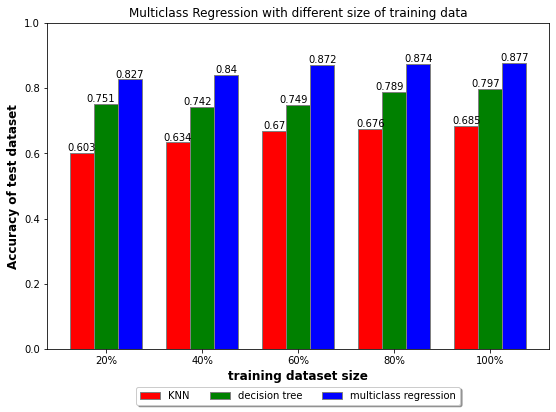

In [374]:
# set width of bar
barWidth = 0.25
fig,ax = plt.subplots(figsize =(9, 6))
 
# set height of bar
KNN = [0.603,0.634,0.670,0.676,0.685]
Multiclass = [0.827,0.840,0.872,0.874,0.877]
DT = [0.751,0.742,0.749,0.789,0.797]
 
# Set position of bar on X axis
br1 = np.arange(len(KNN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, KNN, color ='r', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br2, DT, color ='g', width = barWidth,
        edgecolor ='grey', label ='decision tree')
plt.bar(br3, Multiclass, color ='b', width = barWidth,
        edgecolor ='grey', label ='multiclass regression')
# Adding Xticks
plt.title(f"Multiclass Regression with different size of training data")
plt.xlabel('training dataset size', fontweight ='bold', fontsize = 12)
plt.ylim(0,1)
plt.ylabel('Accuracy of test dataset', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(KNN))],
        ['20%', '40%', '60%', '80%', '100%'])
for i in range (len(br1)):
   plt.text(i,KNN[i],KNN[i],ha = 'center',va='bottom')

for j in range (len(br2)):
    plt.text(j+0.2,DT[j],DT[j],ha = 'center',va='bottom')

for k in range (len(br3)):
    plt.text(k+0.5,Multiclass[k],Multiclass[k],ha = 'center',va='bottom')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()


## Horizontal bar plot showing the top 20 features from the logistic regression on the IMDB data

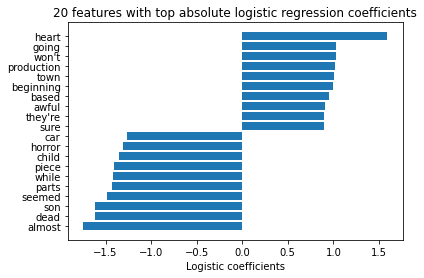

In [375]:
plt.clf()
model_w_argsorted = np.argsort(model.w)
top_20_ind_imdb = np.concatenate((model_w_argsorted[:10], model_w_argsorted[-10:]))
top_20_ws = model.w[top_20_ind_imdb]
top_20_w_words = imdb_vocal_np[features[top_20_ind_imdb]]
plt.barh(top_20_w_words, top_20_ws, align='center')
plt.xlabel('Logistic coefficients')
plt.title('20 features with top absolute logistic regression coefficients')

plt.show()

## Heatmap showing the top 5 most positive features from the multi-class classification

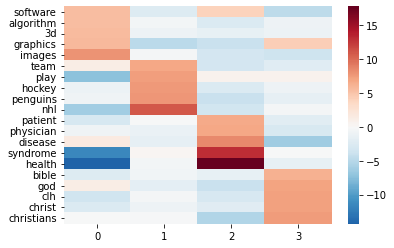

In [376]:
from seaborn import heatmap

col_labels_20 = train_X_20.columns.values
top_5_ind_C0 = np.argsort(mult_model.W[:,0])[-5:]
top_5_ind_C1 = np.argsort(mult_model.W[:,1])[-5:]
top_5_ind_C2 = np.argsort(mult_model.W[:,2])[-5:]
top_5_ind_C3 = np.argsort(mult_model.W[:,3])[-5:]
top_20_ind = np.concatenate((top_5_ind_C0, top_5_ind_C1, top_5_ind_C2, top_5_ind_C3))
coefs = mult_model.W[top_20_ind,:]
top_20_features = col_labels_20[top_20_ind]
hmp = heatmap(coefs, cmap='RdBu_r', center=0, yticklabels=top_20_features)
fig = hmp.get_figure()
fig.savefig("top_20_feature_coefs.png")

# **References**

1. Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher, Learning Word Vectors for Sentiment Analysis, Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies, June 2011, Portland, Oregon, USA, Association for Computational Linguistics, 142--150, http://www.aclweb.org/anthology/P11-1015